In [3]:
pip install pandas nltk

Note: you may need to restart the kernel to use updated packages.


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import json
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from sklearn.preprocessing import LabelEncoder

In [4]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
countries = ['CA', 'DE', 'FR', 'GB', 'IN', 'JP', 'KR', 'MX', 'RU', 'US']

with open('/kaggle/input/youtube-new/CA_category_id.json') as json_file:
    json_data = json.load(json_file)

category_dict = {item['id']: item['snippet']['title'] for item in json_data['items']}

for country in countries:
    file_path = f'/kaggle/input/youtube-new/{country}videos.csv'
    exec(f"{country} = pd.read_csv(file_path, encoding='latin1')")
    exec(f"{country}['category_id'] = {country}['category_id'].astype(str)")
    exec(f"{country}['category_title'] = {country}['category_id'].map(category_dict)")
    # exec(f"{country}.drop(columns=['category_id'], inplace=True)")

In [6]:
CA.shape

(40881, 17)

In [7]:
DE.shape

(40840, 17)

In [8]:
FR.shape

(40724, 17)

In [9]:
GB.shape

(38916, 17)

In [10]:
IN.shape

(37352, 17)

In [11]:
JP.shape

(20523, 17)

In [12]:
KR.shape

(34567, 17)

In [13]:
MX.shape

(40451, 17)

In [14]:
RU.shape

(40739, 17)

In [15]:
US.shape

(40949, 17)

In [17]:
CA['country'] = 'CA'
DE['country'] = 'DE'
FR['country'] = 'FR'
GB['country'] = 'GB'
IN['country'] = 'IN'
JP['country'] = 'JP'
KR['country'] = 'KR'
MX['country'] = 'MX'
RU['country'] = 'RU'
US['country'] = 'US'

In [18]:
datasets = {
    'CA': CA,  # Canada
    'DE': DE,  # Germany
    'FR': FR,  # France
    'GB': GB,  # United Kingdom
    'IN': IN,  # India
    'JP': JP,  # Japan
    'KR': KR,  # South Korea
    'MX': MX,  # Mexico
    'RU': RU,  # Russia
    'US': US,  # United States
}

In [19]:
flag = True
for country in countries:
    if country in datasets:
        if flag:
            df = datasets[country]
        else:
            df = pd.concat([df, datasets[country]], axis=0, ignore_index=True)
        flag = False
# df.loc[df['category_id'] == '29', 'category_title'] = "Nonprofits & Activism"
# df.drop(columns='category_id', inplace=True)

In [20]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_title,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,CA


In [21]:
df.shape

(375942, 18)

In [22]:
df['category_title'].isnull().sum()

2795

In [23]:
df.loc[df['category_title'].isnull(), 'category_id'].unique()

array(['29'], dtype=object)

In [24]:
df.loc[df['category_id'] == '29', 'category_title'] = "Nonprofits & Activism"
df.drop(columns='category_id', inplace=True)

In [25]:
df['category_title'].isnull().sum()

0

In [26]:
country_categories = {}

for country in countries:
    with open(f'/kaggle/input/youtube-new/{country}_category_id.json') as json_file:
        json_data = json.load(json_file)

    assignable_categories = []
    non_assignable_categories = []

    for item in json_data['items']:
        category_info = {
            'id': item['id'],
            'title': item['snippet']['title'],
            'assignable': item['snippet']['assignable']
        }
        if item['snippet']['assignable']:
            assignable_categories.append(category_info)
        else:
            non_assignable_categories.append(category_info)

    country_categories[country] = {
        'assignable': assignable_categories,
        'non_assignable': non_assignable_categories
    }

In [27]:
assignable_categories.append('29')

In [28]:
assignable_categories

[{'id': '1', 'title': 'Film & Animation', 'assignable': True},
 {'id': '2', 'title': 'Autos & Vehicles', 'assignable': True},
 {'id': '10', 'title': 'Music', 'assignable': True},
 {'id': '15', 'title': 'Pets & Animals', 'assignable': True},
 {'id': '17', 'title': 'Sports', 'assignable': True},
 {'id': '19', 'title': 'Travel & Events', 'assignable': True},
 {'id': '20', 'title': 'Gaming', 'assignable': True},
 {'id': '22', 'title': 'People & Blogs', 'assignable': True},
 {'id': '23', 'title': 'Comedy', 'assignable': True},
 {'id': '24', 'title': 'Entertainment', 'assignable': True},
 {'id': '25', 'title': 'News & Politics', 'assignable': True},
 {'id': '26', 'title': 'Howto & Style', 'assignable': True},
 {'id': '27', 'title': 'Education', 'assignable': True},
 {'id': '28', 'title': 'Science & Technology', 'assignable': True},
 {'id': '29', 'title': 'Nonprofits & Activism', 'assignable': True},
 '29']

In [29]:
df.duplicated().sum()

12570

In [30]:
df[df.duplicated()]

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_title,country
156188,RUCXD3_wW2w,18.14.05,New Hulu Show - SNL,Saturday Night Live,2018-05-13T04:59:28.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""SNL...",723495,6362,1589,420,https://i.ytimg.com/vi/RUCXD3_wW2w/default.jpg,False,False,False,From the executive producer of Sex and the Cit...,Entertainment,GB
156189,p8npDG2ulKQ,18.14.05,BTS (ë°©íìë ë¨) LOVE YOURSELF è½ Tear '...,ibighit,2018-05-06T15:00:02.000Z,"BIGHIT|""ë¹ íí¸""|""ë°©íìë ë¨""|""BTS""|""BA...",26912663,2636004,27675,366899,https://i.ytimg.com/vi/p8npDG2ulKQ/default.jpg,False,False,False,BTS (ë°©íìë ë¨) LOVE YOURSELF è½ Tear '...,Music,GB
156190,aixso4N2vhI,18.14.05,President Trump Gives Remarks on the Joint Com...,The White House,2018-05-08T18:45:37.000Z,[none],89715,2806,488,1657,https://i.ytimg.com/vi/aixso4N2vhI/default.jpg,False,False,False,The White House,News & Politics,GB
156191,bu0m_UdtoaU,18.14.05,Serious Questions: Avengers Infinity War,Screen Junkies,2018-05-06T17:00:03.000Z,"screenjunkies|""screen junkies""|""serious questi...",443621,12892,3829,2275,https://i.ytimg.com/vi/bu0m_UdtoaU/default.jpg,False,False,False,After watching Avengers: Infinity War we have ...,Film & Animation,GB
156192,i-G1hy73Mb8,18.14.05,Eurovision Song Contest 2018 - Opening Ceremon...,Eurovision Song Contest,2018-05-06T19:46:34.000Z,"Eurovision Song Contest|""2018""|""Lisbon""|""Openi...",698827,11721,461,1175,https://i.ytimg.com/vi/i-G1hy73Mb8/default.jpg,False,False,False,"At 18:00 CEST today, the Blue Carpet ceremony ...",Entertainment,GB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369937,iILJvqrAQ_w,18.15.05,Charlie Puth - BOY [Official Audio],Charlie Puth,2018-05-11T04:00:34.000Z,"charlie puth|""boy""|""charlie""|""puth""|""atlantic""...",2124177,81085,1321,4019,https://i.ytimg.com/vi/iILJvqrAQ_w/default.jpg,False,False,False,Voicenotes Available Now: https://Atlantic.lnk...,Music,US
369938,zcEE8J2Bqa8,18.15.05,The Goblin - JACK AND DEAN,Jack and Dean,2018-05-11T18:27:01.000Z,"Jack and Dean|""OMFGItsJackAndDean""|""Jack Howar...",165617,20572,140,1407,https://i.ytimg.com/vi/zcEE8J2Bqa8/default.jpg,False,False,False,That? That's a goblin living under the stairs....,Comedy,US
369939,q1jzwV_s8_Y,18.15.05,Christina Aguilera - Twice (Audio),CAguileraVEVO,2018-05-11T07:00:01.000Z,"Christina Aguilera|""Pop""|""RCA Records Label""|""...",1869585,64523,1891,5903,https://i.ytimg.com/vi/q1jzwV_s8_Y/default.jpg,False,False,False,Pre-order Christina Aguileraâs new album â...,Music,US
369940,mkz1zoo15zI,18.15.05,Richard Jefferson and Tracy McGrady have stron...,ESPN,2018-05-11T19:21:53.000Z,"espn|""espn live""|""dwane casey""|""raptors""|""toro...",472999,3505,163,1511,https://i.ytimg.com/vi/mkz1zoo15zI/default.jpg,False,False,False,Richard Jefferson and Tracy McGrady share thei...,Sports,US


In [31]:
df = df.drop_duplicates()

In [32]:
CA.duplicated().sum()

0

In [33]:
CA = CA.drop_duplicates()

In [34]:
DE.duplicated().sum()

0

In [35]:
DE = DE.drop_duplicates()

In [36]:
FR.duplicated().sum()

0

In [37]:
FR = FR.drop_duplicates()

In [38]:
GB.duplicated().sum()

171

In [39]:
GB = GB.drop_duplicates()

In [40]:
IN.duplicated().sum()

4263

In [41]:
IN = IN.drop_duplicates()

In [42]:
JP.duplicated().sum()

5677

In [43]:
JP = JP.drop_duplicates()

In [44]:
KR.duplicated().sum()

2316

In [45]:
KR = KR.drop_duplicates()

In [46]:
MX.duplicated().sum()

49

In [47]:
MX = MX.drop_duplicates()

In [48]:
RU.duplicated().sum()

46

In [49]:
RU = RU.drop_duplicates()

In [50]:
US.duplicated().sum()

48

In [51]:
US = US.drop_duplicates()

In [52]:
df.isnull().sum()

video_id                      0
trending_date                 0
title                         0
channel_title                 0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description               18681
category_title                0
country                       0
dtype: int64

In [53]:
df.head()

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_title,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,CA


In [54]:
df = df.drop(columns=['video_id'])

In [55]:
df = df.drop(columns=['thumbnail_link'])

In [56]:
df.head()

,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category_title,country
0,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,CA
1,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,False,False,False,STill got a lot of packages. Probably will las...,Comedy,CA
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,CA
3,17.14.11,I Dare You: GOING BALD!?,nigahiga,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,False,False,False,I know it's been a while since we did this sho...,Entertainment,CA
4,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,CA


In [57]:
CA.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_title,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,CA


In [58]:
CA = CA.drop(columns=['video_id', 'category_id', 'country', 'thumbnail_link'])

In [59]:
DE = DE.drop(columns=['video_id', 'category_id', 'country', 'thumbnail_link'])

In [60]:
FR = FR.drop(columns=['video_id', 'category_id', 'country', 'thumbnail_link'])

In [61]:
GB = GB.drop(columns=['video_id', 'category_id', 'country', 'thumbnail_link'])

In [62]:
IN = IN.drop(columns=['video_id', 'category_id', 'country', 'thumbnail_link'])

In [63]:
JP = JP.drop(columns=['video_id', 'category_id', 'country', 'thumbnail_link'])

In [64]:
KR = KR.drop(columns=['video_id', 'category_id', 'country', 'thumbnail_link'])

In [65]:
MX = MX.drop(columns=['video_id', 'category_id', 'country', 'thumbnail_link'])

In [66]:
RU = RU.drop(columns=['video_id', 'category_id', 'country', 'thumbnail_link'])

In [67]:
US = US.drop(columns=['video_id', 'category_id', 'country', 'thumbnail_link'])

In [68]:
df.head()

,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category_title,country
0,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,CA
1,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,False,False,False,STill got a lot of packages. Probably will las...,Comedy,CA
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,CA
3,17.14.11,I Dare You: GOING BALD!?,nigahiga,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,False,False,False,I know it's been a while since we did this sho...,Entertainment,CA
4,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,CA


In [69]:
df.columns

Index(['trending_date', 'title', 'channel_title', 'publish_time', 'tags',
       'views', 'likes', 'dislikes', 'comment_count', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'description',
       'category_title', 'country'],
      dtype='object')

In [70]:
df['trending_year'] = '20' + df['trending_date'].str.split('.').str[0]

df['trending_month'] = df['trending_date'].str.split('.').str[2]

df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

df['trending_day'] = df['trending_date'].dt.day_name()

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['trending_season'] = df['trending_date'].dt.month.apply(get_season)
df.drop(columns=['trending_date'], inplace=True)

In [71]:
df.head()

,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category_title,country,trending_year,trending_month,trending_day,trending_season
0,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,CA,2017,11,Tuesday,Fall
1,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,False,False,False,STill got a lot of packages. Probably will las...,Comedy,CA,2017,11,Tuesday,Fall
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,CA,2017,11,Tuesday,Fall
3,I Dare You: GOING BALD!?,nigahiga,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,False,False,False,I know it's been a while since we did this sho...,Entertainment,CA,2017,11,Tuesday,Fall
4,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,CA,2017,11,Tuesday,Fall


In [72]:
df['title_length'] = df['title'].str.len()

In [73]:
df['channel_title_length'] = df['channel_title'].str.len()

In [76]:
sia = SentimentIntensityAnalyzer()
def sentiment_analysis(title):
    score = sia.polarity_scores(title)['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'
df['title_sentiment'] = df['title'].apply(sentiment_analysis)

In [74]:
sia = SentimentIntensityAnalyzer()
def sentiment_analysis(title):
    score = sia.polarity_scores(title)['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'
df['channel_title_sentiment'] = df['channel_title'].apply(sentiment_analysis)

In [77]:
clickbait_keywords = ['shocking', 'must watch', 'amazing', 'incredible', 'unbelievable', 'you won’t believe']

def is_clickbait(title):
    title_lower = title.lower()
    return any(keyword in title_lower for keyword in clickbait_keywords)
df['clickbait'] = df['title'].apply(is_clickbait)

In [78]:
clickbait_keywords = ['shocking', 'must watch', 'amazing', 'incredible', 'unbelievable', 'you won’t believe']

def is_clickbait(title):
    title_lower = title.lower()
    return any(keyword in title_lower for keyword in clickbait_keywords)
df['channel_clickbait'] = df['channel_title'].apply(is_clickbait)

In [79]:
df.head()

,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,...,trending_year,trending_month,trending_day,trending_season,title_length,channel_title_length,channel_title_sentiment,title_sentiment,clickbait,channel_clickbait
0,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,False,False,...,2017,11,Tuesday,Fall,43,10,neutral,neutral,False,False
1,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,False,False,...,2017,11,Tuesday,Fall,29,9,neutral,negative,False,False
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,False,False,...,2017,11,Tuesday,Fall,53,12,neutral,negative,False,False
3,I Dare You: GOING BALD!?,nigahiga,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,False,False,...,2017,11,Tuesday,Fall,24,8,neutral,neutral,False,False
4,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,False,False,...,2017,11,Tuesday,Fall,43,10,neutral,positive,False,False


In [80]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_year'] = df['publish_time'].dt.year
df['publish_month'] = df['publish_time'].dt.month
df['publish_hour'] = df['publish_time'].dt.hour
df['publish_day'] = df['publish_time'].dt.day_name()

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['publish_season'] = df['publish_month'].apply(get_season)

df.drop(columns=['publish_time'], inplace=True)

In [81]:
df.head()

,title,channel_title,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,...,channel_title_length,channel_title_sentiment,title_sentiment,clickbait,channel_clickbait,publish_year,publish_month,publish_hour,publish_day,publish_season
0,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,False,False,False,...,10,neutral,neutral,False,False,2017,11,17,Friday,Fall
1,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,False,False,False,...,9,neutral,negative,False,False,2017,11,17,Monday,Fall
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,False,False,False,...,12,neutral,negative,False,False,2017,11,19,Sunday,Fall
3,I Dare You: GOING BALD!?,nigahiga,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,False,False,False,...,8,neutral,neutral,False,False,2017,11,18,Sunday,Fall
4,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,False,False,False,...,10,neutral,positive,False,False,2017,11,11,Thursday,Fall


In [82]:
def extract_tags(tags_string):
    return [tag.strip('"') for tag in tags_string.split('|')]
df['extracted_tags'] = df['tags'].apply(extract_tags)
df[['tags', 'extracted_tags']]

,tags,extracted_tags
0,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...","[Eminem, Walk, On, Water, Aftermath/Shady/Inte..."
1,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...","[plush, bad unboxing, unboxing, fan mail, idub..."
2,"racist superman|""rudy""|""mancuso""|""king""|""bach""...","[racist superman, rudy, mancuso, king, bach, r..."
3,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...","[ryan, higa, higatv, nigahiga, i dare you, idy..."
4,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...","[edsheeran, ed sheeran, acoustic, live, cover,..."
...,...,...
375937,"aarons animals|""aarons""|""animals""|""cat""|""cats""...","[aarons animals, aarons, animals, cat, cats, k..."
375938,[none],[[none]]
375939,I gave safiya nygaard a perfect hair makeover ...,[I gave safiya nygaard a perfect hair makeover...
375940,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...","[Black Panther, HISHE, Marvel, Infinity War, H..."


In [83]:
df.drop(columns=['tags'], inplace=True)

In [85]:
df['extracted_tags'] = df['extracted_tags'].apply(lambda x: tuple(x))

In [87]:
df.head()

,title,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,...,channel_title_sentiment,title_sentiment,clickbait,channel_clickbait,publish_year,publish_month,publish_hour,publish_day,publish_season,extracted_tags
0,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,17158579,787425,43420,125882,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,...,neutral,neutral,False,False,2017,11,17,Friday,Fall,"(Eminem, Walk, On, Water, Aftermath/Shady/Inte..."
1,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,1014651,127794,1688,13030,False,False,False,STill got a lot of packages. Probably will las...,...,neutral,negative,False,False,2017,11,17,Monday,Fall,"(plush, bad unboxing, unboxing, fan mail, idub..."
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,3191434,146035,5339,8181,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,...,neutral,negative,False,False,2017,11,19,Sunday,Fall,"(racist superman, rudy, mancuso, king, bach, r..."
3,I Dare You: GOING BALD!?,nigahiga,2095828,132239,1989,17518,False,False,False,I know it's been a while since we did this sho...,...,neutral,neutral,False,False,2017,11,18,Sunday,Fall,"(ryan, higa, higatv, nigahiga, i dare you, idy..."
4,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,33523622,1634130,21082,85067,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,...,neutral,positive,False,False,2017,11,11,Thursday,Fall,"(edsheeran, ed sheeran, acoustic, live, cover,..."


In [111]:
df['engagement'] = df['likes'] + df['comment_count']

def engagement_level(engagement):
    if engagement <= 100:
        return 'Low'
    elif engagement <= 500:
        return 'Medium'
    else:
        return 'High'

df['engagement_level'] = df['engagement'].apply(engagement_level)

In [112]:
df['engagement_level'].value_counts()

engagement_level
High      16316
Medium     2522
Low        1162
Name: count, dtype: int64

In [113]:
df.head()

,title,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category_title,country,trending_year,trending_month,trending_day,trending_season,title_length,channel_title_length,channel_title_sentiment,title_sentiment,clickbait,channel_clickbait,publish_year,publish_month,publish_hour,publish_day,publish_season,extracted_tags,engagement,engagement_level
354968,Paterno (2018) Official Trailer ft. Al Pacino ...,HBO,102802,818,77,189,False,False,False,Paterno (starring Al Pacino) centers on Penn S...,Film & Animation,US,2018,02,Saturday,Winter,51,3,neutral,neutral,False,False,2018,2,18,Friday,Winter,"(HBO, Paterno, Joe Paterno, Penn State Coach, ...",1007,High
104879,L'algerino - Va Bene (Paroles/Lyrics),RaparolesVEVO,80481,2246,45,70,False,False,False,L'algerino - Va Bene (Paroles/Lyrics) \nLalger...,Music,FR,2018,03,Monday,Spring,37,13,neutral,neutral,False,False,2018,3,2,Sunday,Spring,"(lagerino va bene, l'algerino va bene, raparol...",2316,High
59683,KING KHALIL - IMMER NOCH (PROD.BY THE CRATEZ x...,TEAM KUKU,280135,24407,1865,1678,False,False,False,âºâº âKUKU EFFEKTâ jetzt bestellen: http...,Music,DE,2018,02,Sunday,Winter,55,9,neutral,neutral,False,False,2018,2,17,Friday,Winter,"(Capital Bra, Blyat, Blyat Album, Capital Bra ...",26085,High
4598,Jurassic World: Fallen Kingdom - Trailer Thurs...,Universal Pictures,6133557,58775,4957,10219,False,False,False,Jurassic World: Fallen Kingdom - See the trail...,Entertainment,CA,2017,12,Thursday,Winter,60,18,neutral,negative,False,False,2017,12,0,Monday,Winter,"(Jurassic World, Fallen Kingdom, Jurassic Park...",68994,High
140230,BlocBoy JB & Drake Look Alive Prod By: Tay Kei...,BlocBoy JB,7719052,253635,4595,20359,False,False,False,"For Features, Booking, & Etc Email BlocBoyJB@G...",Music,GB,2018,02,Tuesday,Winter,94,10,neutral,positive,False,False,2018,2,5,Friday,Winter,"(OVO, BLOCNATION, BLOCBOY JB, DRAKE, ALI PROSU...",273994,High


### Description

In [114]:
df[df['description'].isnull()]

,title,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category_title,country,trending_year,trending_month,trending_day,trending_season,title_length,channel_title_length,channel_title_sentiment,title_sentiment,clickbait,channel_clickbait,publish_year,publish_month,publish_hour,publish_day,publish_season,extracted_tags,engagement,engagement_level
304309,ÐÐ¾Ð²Ð¾ÑÑÐ¸ Ð¦*Ð¢Ð 02.01.2018 ÐÑÐ¿ÑÑÐº...,NEWES RU,84304,182,132,190,False,False,False,NaN,News & Politics,RU,2018,01,Wednesday,Winter,60,8,neutral,neutral,False,False,2018,1,7,Tuesday,Winter,"([none],)",372,Medium
18426,Synvain RÃ©nove | #16 | L'hÃ´tel,CHESTBRAS,3862,261,8,14,False,False,False,NaN,Comedy,CA,2018,02,Friday,Winter,32,9,neutral,neutral,False,False,2018,2,20,Thursday,Winter,"(synvain renove, construction maison, rÃ©novat...",275,Medium
303572,ÐÐ¸Ð°ÑÐ»Ð¾Ð½. Ð Ð¾Ð¶Ð´ÐµÑÑÐ²ÐµÐ½ÑÐºÐ°Ñ Ð...,ÐÐ¸Ð°ÑÐ»Ð¾Ð½ HD,79557,490,73,142,False,False,False,NaN,Sports,RU,2017,12,Saturday,Winter,103,17,neutral,neutral,False,False,2017,12,19,Thursday,Winter,"([none],)",632,High
244648,íê·¹ê¸°ìë³´:ëê¸ì¡°ì 54ì°¨ íê·¹ê¸°ì§...,"íì¤ì ìTV,",30606,1679,95,13,False,False,False,NaN,Entertainment,KR,2018,04,Sunday,Spring,67,15,neutral,neutral,False,False,2018,4,12,Saturday,Spring,"([none],)",1692,High
50131,Ekskluzive - Albin Kurti Flet pas Lirimit nga ...,Kallxo.com,27270,124,17,0,True,False,False,NaN,News & Politics,DE,2017,12,Saturday,Winter,57,10,neutral,neutral,False,False,2017,12,15,Friday,Winter,"(kallxo.com, kallxo, jeta, gazeta, lajmi, Koso...",124,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222761,"ì¡°ê°ì TV/ì¬ì¬ì² , 'ì§ê¸ ë´ëì´ ì§í...",ì¡°ê°ì TV,45060,2572,38,311,False,False,False,NaN,News & Politics,KR,2017,12,Sunday,Winter,91,11,neutral,neutral,False,False,2017,11,22,Wednesday,Fall,"([none],)",2883,High
292963,Nacha y Teresa 27,Resumiendo,48486,785,23,244,False,False,False,NaN,Film & Animation,MX,2018,06,Thursday,Summer,17,10,neutral,neutral,False,False,2018,6,16,Wednesday,Summer,"(nachesa, nacha y teresa, teresa y nacha, nach...",1029,High
210461,Class A Improve Their Quirk - Boku No Hero Aca...,Hammer Kick,989752,8596,314,1279,False,False,False,NaN,Film & Animation,JP,2018,04,Monday,Spring,70,11,neutral,positive,False,False,2018,4,14,Saturday,Spring,"(Class A Improve Their Quirk, Boku No Hero Aca...",9875,High
101877,#MBCTheVoice - Ù Ø±Ø­ÙØ© Ø§ÙØµÙØª ÙØ¨Ø³ - ...,MBC The Voice,613488,5600,418,375,False,False,False,NaN,Entertainment,FR,2018,02,Sunday,Winter,61,13,neutral,neutral,False,False,2018,2,18,Saturday,Winter,"([none],)",5975,High


In [115]:
df = df.sample(n=20000, random_state=42)

In [116]:
non_null_descriptions = df[df['description'].notna()]

In [117]:
def sentiment_analysis(description):
    if isinstance(description, str):
        score = sia.polarity_scores(description)['compound']
        if score >= 0.05:
            return 'positive'
        elif score <= -0.05:
            return 'negative'
        else:
            return 'neutral'
    return 'neutral'

In [118]:
non_null_descriptions['description_sentiment'] = non_null_descriptions['description'].apply(sentiment_analysis)

In [119]:
pd.set_option('display.max_columns', None)

In [120]:
non_null_descriptions

,title,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category_title,country,trending_year,trending_month,trending_day,trending_season,title_length,channel_title_length,channel_title_sentiment,title_sentiment,clickbait,channel_clickbait,publish_year,publish_month,publish_hour,publish_day,publish_season,extracted_tags,engagement,engagement_level,description_sentiment
303179,ÐÐÐÐÐ¡Ð¢Ð. ÐÐÐ¤ÐÐ ÐÐÐ¦ÐÐÐÐÐ«Ð Ð...,Sasha Sotnik,63992,5570,43,567,False,False,False,Ð Ð³Ð»Ð°Ð²Ð½ÑÑ ÑÐ¾Ð±ÑÑÐ¸ÑÑ 27 Ð´ÐµÐºÐ°...,News & Politics,RU,2017,12,Thursday,Winter,68,12,neutral,neutral,False,False,2017,12,18,Wednesday,Winter,"([none],)",6137,High,negative
125171,"ASOS UNBOXING HAUL, LESSONS & SUSHI",Tanya Burr,415643,11725,452,313,False,False,False,"ASOS UNBOXING HAUL, LESSONS & SUSHI\nYou can b...",Howto & Style,GB,2017,11,Monday,Fall,35,10,neutral,neutral,False,False,2017,11,16,Wednesday,Fall,"(asos, tanya burr, tanya, burr, haul, shopping...",12038,High,positive
359525,TOMB RAIDER TEMPLE CAKE - NERDY NUMMIES,Rosanna Pansino,562238,20387,357,3651,False,False,False,Today I made a Pineapple flavored Tomb Raider ...,Howto & Style,US,2018,03,Sunday,Spring,39,15,neutral,negative,False,False,2018,3,18,Tuesday,Spring,"(baking, how to, basic, simple, easy, step by ...",24038,High,negative
275008,ZoÃ© - Azul - Letra,Pablo hernandez,41341,1733,15,48,False,False,False,Estoy cayÃ©ndome a pedazos por tu ausencia ð,Music,MX,2018,03,Friday,Spring,19,15,neutral,neutral,False,False,2018,3,16,Thursday,Spring,"(ZoÃ©, Azul, Letra, lyrics, 2018, leon larregu...",1781,High,neutral
259898,UÃ±as acrÃ­licas Doradas con Rojo con tÃ©cnica...,rosalinda MartÃ­nez,7676,642,20,141,False,False,False,Hola mis amiguitos los pasÃ³ a compartir este ...,Howto & Style,MX,2017,12,Thursday,Winter,73,19,neutral,neutral,False,False,2017,12,18,Wednesday,Winter,(UÃ±as acrilicas doradas con tÃ©cnica de navaj...,783,High,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375360,BIG SHAQ - MAN DON'T DANCE (OFFICIAL MUSIC VIDEO),Michael Dapaah,3291375,237975,8625,23787,False,False,False,Man Don't Dance performed by Big Shaq (Michael...,Comedy,US,2018,06,Tuesday,Summer,49,14,neutral,neutral,False,False,2018,6,21,Sunday,Summer,"(man don't dance, man dont dance, BIG SHAQ - M...",261762,High,neutral
134758,ì¸í¼ëí¸(INFINITE) Tell Me Official MV,woolliment,2369036,231288,836,33571,False,False,False,"If you like this Video, Plz click LIKE and SUB...",Entertainment,GB,2018,01,Tuesday,Winter,42,10,neutral,neutral,False,False,2018,1,9,Monday,Winter,"(INFINITE, TELL ME, 3RD ALBUM, TOP SEED, SUNGK...",264859,High,positive
246523,4ë¶ ì´ììë ì ë³ì¸ ì¡°ì§ê³¼ ë°ì§ì...,í©ì¥ìì ë´ì¤ë¸ë¦¬ío,77992,3879,23,520,False,False,False,4ë¶ ì´ììë ì ë³ì¸ ì¡°ì§ê³¼ ë°ì§ì...,News & Politics,KR,2018,05,Friday,Spring,144,29,neutral,neutral,False,False,2018,5,6,Thursday,Spring,"(í©ì¥ì, ë´ì¤ë¸ë¦¬í, ì ë³ì¸, ë°ì§...",4399,High,neutral
94323,4Keus Gang - Le Temps Passe,4KEUS GVNG OFFICIEL,221656,10430,339,1099,False,False,False,PÃ©kÃ© - Le Black - Bouska - HK\n2eme Extrait ...,People & Blogs,FR,2018,01,Thursday,Winter,27,19,neutral,neutral,False,False,2018,1,14,Wednesday,Winter,"(#kaaris, #booba, #ninho, #hornetlafrappe, #se...",11529,High,neutral


In [121]:
non_null_descriptions['description_length'] = non_null_descriptions['description'].str.len()

In [122]:
decimalPart = (non_null_descriptions['description_length'].dropna() - non_null_descriptions['description_length'].dropna().astype(int)).unique()
decimalPart

array([0])

In [123]:
non_null_descriptions['description_length'] = non_null_descriptions['description_length'].astype(int)

In [124]:
non_null_descriptions

,title,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category_title,country,trending_year,trending_month,trending_day,trending_season,title_length,channel_title_length,channel_title_sentiment,title_sentiment,clickbait,channel_clickbait,publish_year,publish_month,publish_hour,publish_day,publish_season,extracted_tags,engagement,engagement_level,description_sentiment,description_length
303179,ÐÐÐÐÐ¡Ð¢Ð. ÐÐÐ¤ÐÐ ÐÐÐ¦ÐÐÐÐÐ«Ð Ð...,Sasha Sotnik,63992,5570,43,567,False,False,False,Ð Ð³Ð»Ð°Ð²Ð½ÑÑ ÑÐ¾Ð±ÑÑÐ¸ÑÑ 27 Ð´ÐµÐºÐ°...,News & Politics,RU,2017,12,Thursday,Winter,68,12,neutral,neutral,False,False,2017,12,18,Wednesday,Winter,"([none],)",6137,High,negative,1378
125171,"ASOS UNBOXING HAUL, LESSONS & SUSHI",Tanya Burr,415643,11725,452,313,False,False,False,"ASOS UNBOXING HAUL, LESSONS & SUSHI\nYou can b...",Howto & Style,GB,2017,11,Monday,Fall,35,10,neutral,neutral,False,False,2017,11,16,Wednesday,Fall,"(asos, tanya burr, tanya, burr, haul, shopping...",12038,High,positive,1918
359525,TOMB RAIDER TEMPLE CAKE - NERDY NUMMIES,Rosanna Pansino,562238,20387,357,3651,False,False,False,Today I made a Pineapple flavored Tomb Raider ...,Howto & Style,US,2018,03,Sunday,Spring,39,15,neutral,negative,False,False,2018,3,18,Tuesday,Spring,"(baking, how to, basic, simple, easy, step by ...",24038,High,negative,851
275008,ZoÃ© - Azul - Letra,Pablo hernandez,41341,1733,15,48,False,False,False,Estoy cayÃ©ndome a pedazos por tu ausencia ð,Music,MX,2018,03,Friday,Spring,19,15,neutral,neutral,False,False,2018,3,16,Thursday,Spring,"(ZoÃ©, Azul, Letra, lyrics, 2018, leon larregu...",1781,High,neutral,47
259898,UÃ±as acrÃ­licas Doradas con Rojo con tÃ©cnica...,rosalinda MartÃ­nez,7676,642,20,141,False,False,False,Hola mis amiguitos los pasÃ³ a compartir este ...,Howto & Style,MX,2017,12,Thursday,Winter,73,19,neutral,neutral,False,False,2017,12,18,Wednesday,Winter,(UÃ±as acrilicas doradas con tÃ©cnica de navaj...,783,High,neutral,381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375360,BIG SHAQ - MAN DON'T DANCE (OFFICIAL MUSIC VIDEO),Michael Dapaah,3291375,237975,8625,23787,False,False,False,Man Don't Dance performed by Big Shaq (Michael...,Comedy,US,2018,06,Tuesday,Summer,49,14,neutral,neutral,False,False,2018,6,21,Sunday,Summer,"(man don't dance, man dont dance, BIG SHAQ - M...",261762,High,neutral,725
134758,ì¸í¼ëí¸(INFINITE) Tell Me Official MV,woolliment,2369036,231288,836,33571,False,False,False,"If you like this Video, Plz click LIKE and SUB...",Entertainment,GB,2018,01,Tuesday,Winter,42,10,neutral,neutral,False,False,2018,1,9,Monday,Winter,"(INFINITE, TELL ME, 3RD ALBUM, TOP SEED, SUNGK...",264859,High,positive,479
246523,4ë¶ ì´ììë ì ë³ì¸ ì¡°ì§ê³¼ ë°ì§ì...,í©ì¥ìì ë´ì¤ë¸ë¦¬ío,77992,3879,23,520,False,False,False,4ë¶ ì´ììë ì ë³ì¸ ì¡°ì§ê³¼ ë°ì§ì...,News & Politics,KR,2018,05,Friday,Spring,144,29,neutral,neutral,False,False,2018,5,6,Thursday,Spring,"(í©ì¥ì, ë´ì¤ë¸ë¦¬í, ì ë³ì¸, ë°ì§...",4399,High,neutral,242
94323,4Keus Gang - Le Temps Passe,4KEUS GVNG OFFICIEL,221656,10430,339,1099,False,False,False,PÃ©kÃ© - Le Black - Bouska - HK\n2eme Extrait ...,People & Blogs,FR,2018,01,Thursday,Winter,27,19,neutral,neutral,False,False,2018,1,14,Wednesday,Winter,"(#kaaris, #booba, #ninho, #hornetlafrappe, #se...",11529,High,neutral,419


In [125]:
non_null_descriptions['description_sentiment'].value_counts()

description_sentiment
positive    8238
neutral     7824
negative    2840
Name: count, dtype: int64

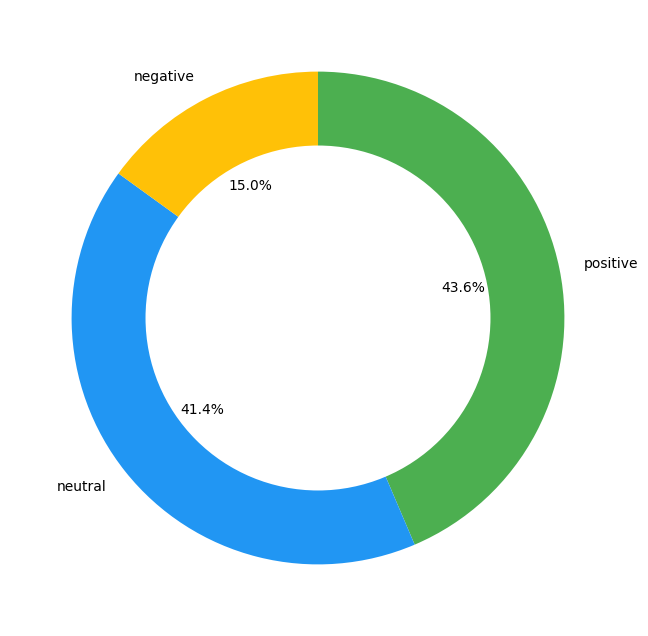

In [128]:
labels = non_null_descriptions['description_sentiment'].value_counts().index
sizes = non_null_descriptions['description_sentiment'].value_counts().values
colors = ['#4CAF50', '#2196F3', '#FFC107']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, startangle=90, counterclock=False, autopct='%1.1f%%')

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

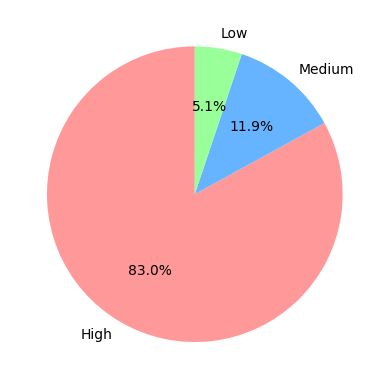

In [129]:
labels = non_null_descriptions['engagement_level'].value_counts().index.astype(str)
sizes = non_null_descriptions['engagement_level'].value_counts().values
colors = ['#FF9999', '#66B3FF', '#99FF99'] 

plt.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
plt.show()

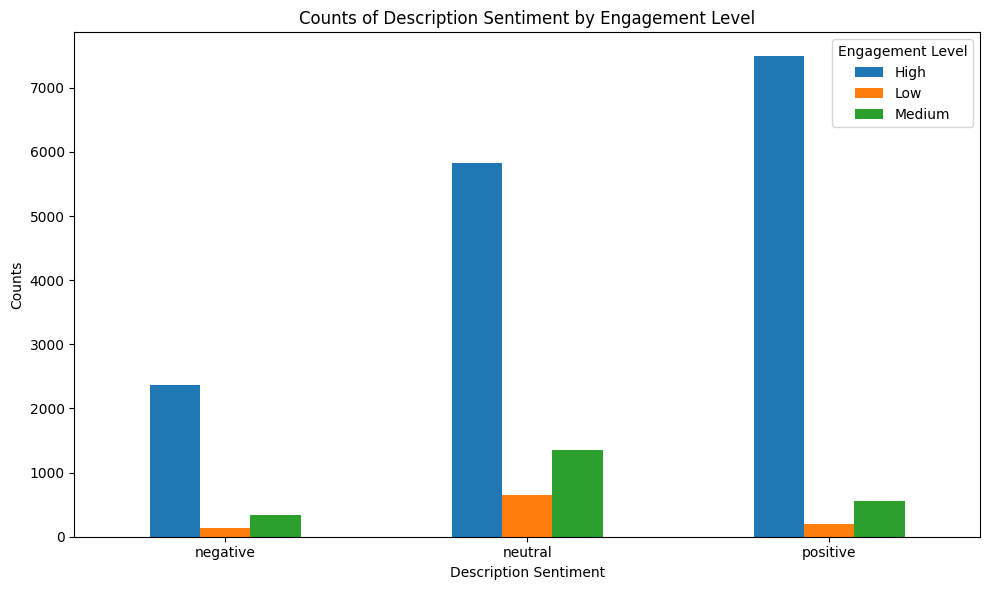

In [138]:
# E1

contingency_table = pd.crosstab(non_null_descriptions['description_sentiment'], non_null_descriptions['engagement_level'])
contingency_table.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Description Sentiment')
plt.ylabel('Counts')
plt.title('Counts of Description Sentiment by Engagement Level')
plt.xticks(rotation=0)
plt.legend(title='Engagement Level')
plt.tight_layout()
plt.show()

In [133]:
non_null_descriptions['description_length'].describe()

count    18902.000000
mean       979.695323
std        985.200286
min          2.000000
25%        319.000000
50%        688.000000
75%       1303.000000
max      11938.000000
Name: description_length, dtype: float64

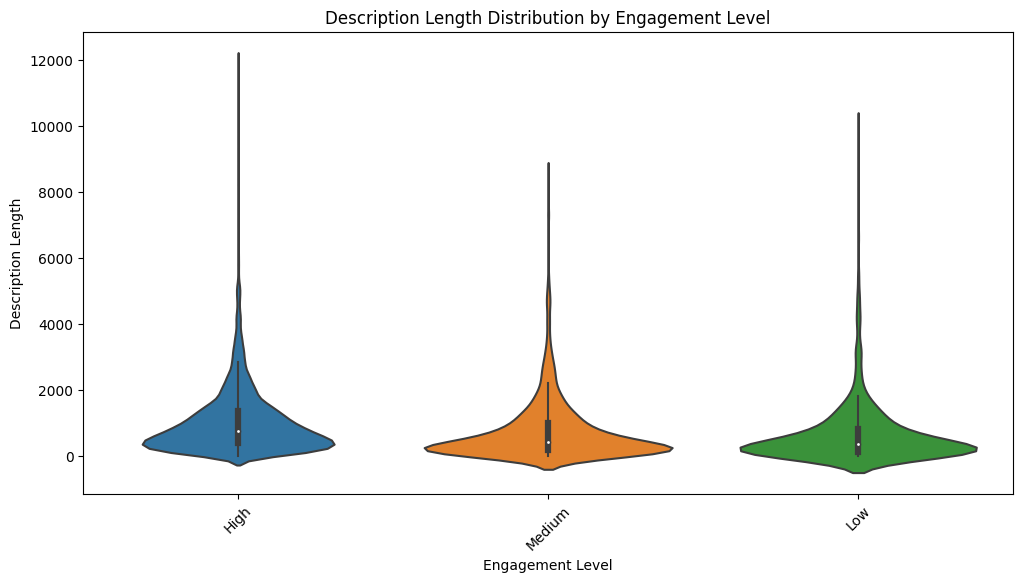

In [137]:
# E2 
plt.figure(figsize=(12, 6))
sns.violinplot(x='engagement_level', y='description_length', data=non_null_descriptions)

plt.title('Description Length Distribution by Engagement Level')
plt.xlabel('Engagement Level')
plt.ylabel('Description Length')
plt.xticks(rotation=45)
plt.show()

### --------

In [139]:
df.dtypes

title                      object
channel_title              object
views                       int64
likes                       int64
dislikes                    int64
comment_count               int64
comments_disabled            bool
ratings_disabled             bool
video_error_or_removed       bool
description                object
category_title             object
country                    object
trending_year              object
trending_month             object
trending_day               object
trending_season            object
title_length                int64
channel_title_length        int64
channel_title_sentiment    object
title_sentiment            object
clickbait                    bool
channel_clickbait            bool
publish_year                int32
publish_month               int32
publish_hour                int32
publish_day                object
publish_season             object
extracted_tags             object
engagement                  int64
engagement_lev

In [140]:
df['engagement_level'] = df['engagement_level'].astype('category')
df['publish_season'] = df['publish_season'].astype('category')
df['publish_day'] = df['publish_day'].astype('category')
df['title_sentiment'] = df['title_sentiment'].astype('category')
df['trending_season'] = df['trending_season'].astype('category')
df['trending_day'] = df['trending_day'].astype('category')
df['trending_month'] = df['trending_month'].astype('int32')
df['trending_year'] = df['trending_year'].astype('int32')
df['trending_season'] = df['trending_season'].astype('category')
df['category_title'] = df['category_title'].astype('category')

In [141]:
for column, dtype in df.dtypes.items():
    if pd.api.types.is_bool_dtype(dtype):
        print(f"{column}: Boolean")
    elif pd.api.types.is_categorical_dtype(dtype):
        print(f"{column}: Categorical")
    elif pd.api.types.is_numeric_dtype(dtype):
        print(f"{column}: Numerical")
    else:
        print(f"{column}: String")

title: String
channel_title: String
views: Numerical
likes: Numerical
dislikes: Numerical
comment_count: Numerical
comments_disabled: Boolean
ratings_disabled: Boolean
video_error_or_removed: Boolean
description: String
category_title: Categorical
country: String
trending_year: Numerical
trending_month: Numerical
trending_day: Categorical
trending_season: Categorical
title_length: Numerical
channel_title_length: Numerical
channel_title_sentiment: String
title_sentiment: Categorical
clickbait: Boolean
channel_clickbait: Boolean
publish_year: Numerical
publish_month: Numerical
publish_hour: Numerical
publish_day: Categorical
publish_season: Categorical
extracted_tags: String
engagement: Numerical
engagement_level: Categorical


In [142]:
print("Numerical Columns:")
print(df.select_dtypes(include='number').columns.tolist())

Numerical Columns:
['views', 'likes', 'dislikes', 'comment_count', 'trending_year', 'trending_month', 'title_length', 'channel_title_length', 'publish_year', 'publish_month', 'publish_hour', 'engagement']


In [147]:
df['views'].describe()

count    2.000000e+04
mean     1.349209e+06
std      6.723816e+06
min      5.890000e+02
25%      4.696450e+04
50%      1.808860e+05
75%      6.722875e+05
max      3.045306e+08
Name: views, dtype: float64

In [148]:
df['likes'].describe()

count    2.000000e+04
mean     4.015062e+04
std      1.729712e+05
min      0.000000e+00
25%      6.737500e+02
50%      3.610000e+03
75%      1.838725e+04
max      5.595203e+06
Name: likes, dtype: float64

In [149]:
df['dislikes'].describe()

count    2.000000e+04
mean     2.145178e+03
std      2.002040e+04
min      0.000000e+00
25%      4.100000e+01
50%      1.820000e+02
75%      7.732500e+02
max      1.712284e+06
Name: dislikes, dtype: float64

In [150]:
df['comment_count'].describe()

count    2.000000e+04
mean     4.433968e+03
std      2.629723e+04
min      0.000000e+00
25%      1.060000e+02
50%      5.280000e+02
75%      2.099000e+03
max      1.225326e+06
Name: comment_count, dtype: float64

In [151]:
df['engagement'].describe()

count    2.000000e+04
mean     4.458458e+04
std      1.961266e+05
min      0.000000e+00
25%      8.577500e+02
50%      4.303500e+03
75%      2.095925e+04
max      6.820529e+06
Name: engagement, dtype: float64

In [72]:
df['title_length'].describe()

count    20000.00000
mean        66.51135
std         35.70500
min          3.00000
25%         42.00000
50%         59.00000
75%         83.00000
max        293.00000
Name: title_length, dtype: float64

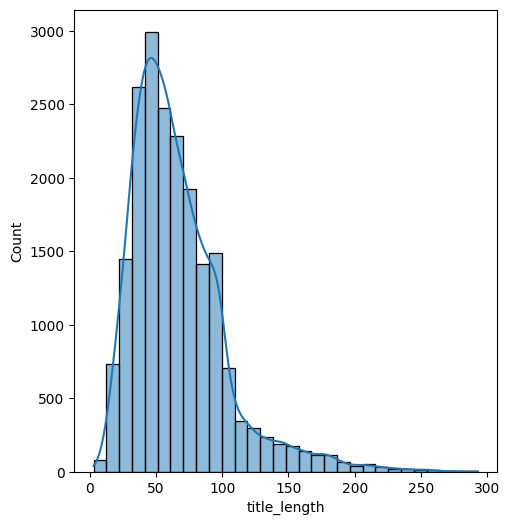

In [152]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['title_length'], kde=True, bins=30)
plt.show()

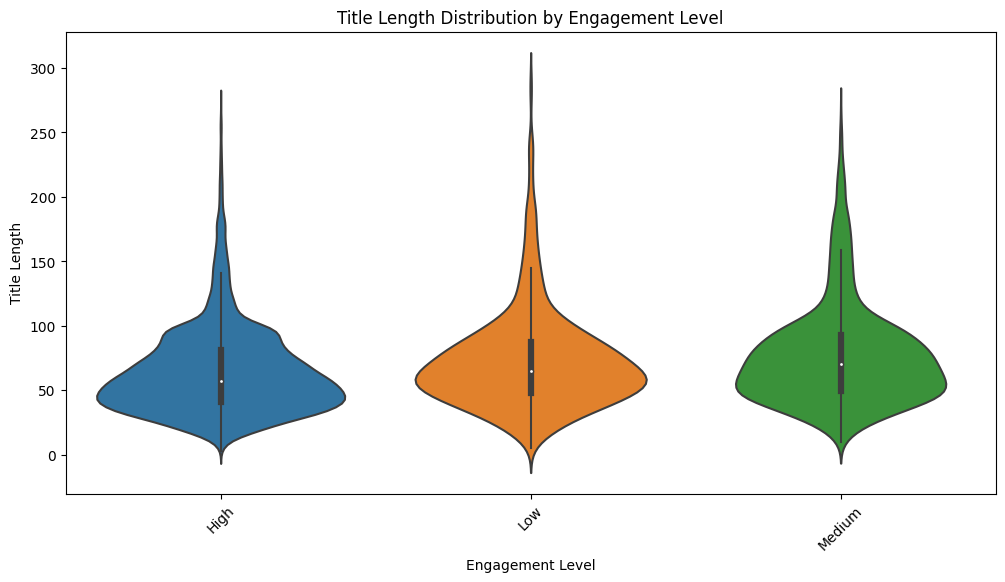

In [158]:
# Q6
plt.figure(figsize=(12, 6))
sns.violinplot(x='engagement_level', y='title_length', data=df)

plt.title('Title Length Distribution by Engagement Level')
plt.xlabel('Engagement Level')
plt.ylabel('Title Length')
plt.xticks(rotation=45)
plt.show()

In [73]:
df['trending_year'].value_counts()

trending_year
2018    15427
2017     4573
Name: count, dtype: int64

In [74]:
df['publish_year'].value_counts()

publish_year
2018    15129
2017     4819
2013       10
2015       10
2014        9
2011        7
2010        6
2008        5
2016        3
2007        2
Name: count, dtype: int64

In [75]:
df['trending_month'].value_counts()

trending_month
3     3053
5     2976
12    2938
2     2783
1     2778
4     2486
11    1635
6     1351
Name: count, dtype: int64

In [76]:
df['publish_month'].value_counts()

publish_month
3     3087
5     2975
12    2915
2     2870
1     2729
4     2466
11    1898
6     1033
9       10
8        8
10       7
7        2
Name: count, dtype: int64

In [77]:
df['publish_hour'].value_counts()

publish_hour
16    1534
15    1409
17    1408
14    1196
18    1139
13    1031
19     931
20     865
21     851
12     820
9      812
11     790
10     768
22     699
8      649
5      621
3      605
4      603
2      587
7      576
23     555
1      545
6      511
0      495
Name: count, dtype: int64

In [78]:
df['publish_hour'].describe()

count    20000.000000
mean        12.806300
std          6.251187
min          0.000000
25%          8.000000
50%         14.000000
75%         18.000000
max         23.000000
Name: publish_hour, dtype: float64

In [143]:
print("Categorical Columns:")
print(df.select_dtypes(include='category').columns.tolist())

Categorical Columns:
['category_title', 'trending_day', 'trending_season', 'title_sentiment', 'publish_day', 'publish_season', 'engagement_level']


In [80]:
df['category_title'].value_counts()

category_title
Entertainment            5786
People & Blogs           2914
Music                    2350
News & Politics          1922
Comedy                   1464
Sports                   1260
Film & Animation         1072
Howto & Style             985
Gaming                    597
Science & Technology      450
Education                 415
Autos & Vehicles          259
Pets & Animals            256
Nonprofits & Activism     139
Travel & Events            83
Shows                      44
Movies                      4
Name: count, dtype: int64

In [81]:
df['trending_day'].value_counts()

trending_day
Saturday     3015
Tuesday      2912
Monday       2860
Sunday       2849
Wednesday    2810
Thursday     2807
Friday       2747
Name: count, dtype: int64

In [82]:
df['publish_day'].value_counts()

publish_day
Friday       3419
Thursday     3029
Tuesday      2866
Monday       2861
Wednesday    2792
Sunday       2542
Saturday     2491
Name: count, dtype: int64

In [83]:
df['trending_season'].value_counts()

trending_season
Spring    8515
Winter    8499
Fall      1635
Summer    1351
Name: count, dtype: int64

In [84]:
df['publish_season'].value_counts()

publish_season
Spring    8528
Winter    8514
Fall      1915
Summer    1043
Name: count, dtype: int64

In [85]:
df['title_sentiment'].value_counts()

title_sentiment
neutral     14879
positive     2826
negative     2295
Name: count, dtype: int64

In [86]:
df['engagement_level'].value_counts()

engagement_level
High      16316
Medium     2522
Low        1162
Name: count, dtype: int64

In [144]:
print("Boolean Columns:")
print(df.select_dtypes(include='bool').columns.tolist())

Boolean Columns:
['comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'clickbait', 'channel_clickbait']


In [88]:
print(df['comments_disabled'].value_counts())
print('----------------------------')
print(df['ratings_disabled'].value_counts())
print('----------------------------')
print(df['video_error_or_removed'].value_counts())
print('----------------------------')
print(df['clickbait'].value_counts())

comments_disabled
False    19545
True       455
Name: count, dtype: int64
----------------------------
ratings_disabled
False    19624
True       376
Name: count, dtype: int64
----------------------------
video_error_or_removed
False    19992
True         8
Name: count, dtype: int64
----------------------------
clickbait
False    19952
True        48
Name: count, dtype: int64


In [89]:
print("String Columns:")
print(df.select_dtypes(include='object').columns.tolist())

String Columns:
['title', 'channel_title', 'description', 'country', 'extracted_tags']


In [145]:
bools = df.select_dtypes(include='bool').columns
df[bools] = df[bools].astype(int)

In [91]:
# labelEncoder = LabelEncoder()
# mappings = {}
# categorical = ['category_title', 'trending_day', 'trending_season', 'title_sentiment', 'publish_day', 'publish_season', 'engagement_level']

# for column in categorical:
#     CA[column] = labelEncoder.fit_transform(CA[column])
#     mappings[column] = labelEncoder.classes_

In [92]:
# for column, classes in mappings.items():
#     print(f"\nMapping for {column}:")
#     for idx, category in enumerate(classes):
#         print(f"{idx}: {category}")

In [159]:
import ast

def parse_tags(x):
    if isinstance(x, (list, tuple)):
        return list(x)
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except (ValueError, SyntaxError):
            return [t.strip() for t in x.split(',') if t.strip()]
    return []

df['extracted_tags'] = df['extracted_tags'].apply(parse_tags)

df['n_tags'] = df['extracted_tags'].apply(len)
df['like_ratio'] = df['likes'] / df['views']
df['dislike_ratio'] = df['dislikes'] / df['views']


In [160]:
df.head()

,title,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category_title,country,trending_year,trending_month,trending_day,trending_season,title_length,channel_title_length,channel_title_sentiment,title_sentiment,clickbait,channel_clickbait,publish_year,publish_month,publish_hour,publish_day,publish_season,extracted_tags,engagement,engagement_level,n_tags,like_ratio,dislike_ratio
303179,ÐÐÐÐÐ¡Ð¢Ð. ÐÐÐ¤ÐÐ ÐÐÐ¦ÐÐÐÐÐ«Ð Ð...,Sasha Sotnik,63992,5570,43,567,0,0,0,Ð Ð³Ð»Ð°Ð²Ð½ÑÑ ÑÐ¾Ð±ÑÑÐ¸ÑÑ 27 Ð´ÐµÐºÐ°...,News & Politics,RU,2017,12,Thursday,Winter,68,12,neutral,neutral,0,0,2017,12,18,Wednesday,Winter,[[none]],6137,High,1,0.087042,0.000672
270102,Monterrey Vs Leon En Vivo Liga MX 2018 - Narra...,Game Live,73107,352,65,3,0,0,0,NaN,Sports,MX,2018,2,Monday,Winter,50,9,neutral,neutral,0,0,2018,2,3,Sunday,Winter,[[none]],355,Medium,1,0.004815,0.000889
125171,"ASOS UNBOXING HAUL, LESSONS & SUSHI",Tanya Burr,415643,11725,452,313,0,0,0,"ASOS UNBOXING HAUL, LESSONS & SUSHI\nYou can b...",Howto & Style,GB,2017,11,Monday,Fall,35,10,neutral,neutral,0,0,2017,11,16,Wednesday,Fall,"[asos, tanya burr, tanya, burr, haul, shopping...",12038,High,29,0.028209,0.001087
359525,TOMB RAIDER TEMPLE CAKE - NERDY NUMMIES,Rosanna Pansino,562238,20387,357,3651,0,0,0,Today I made a Pineapple flavored Tomb Raider ...,Howto & Style,US,2018,3,Sunday,Spring,39,15,neutral,negative,0,0,2018,3,18,Tuesday,Spring,"[baking, how to, basic, simple, easy, step by ...",24038,High,51,0.036260,0.000635
275008,ZoÃ© - Azul - Letra,Pablo hernandez,41341,1733,15,48,0,0,0,Estoy cayÃ©ndome a pedazos por tu ausencia ð,Music,MX,2018,3,Friday,Spring,19,15,neutral,neutral,0,0,2018,3,16,Thursday,Spring,"[ZoÃ©, Azul, Letra, lyrics, 2018, leon larregu...",1781,High,7,0.041920,0.000363


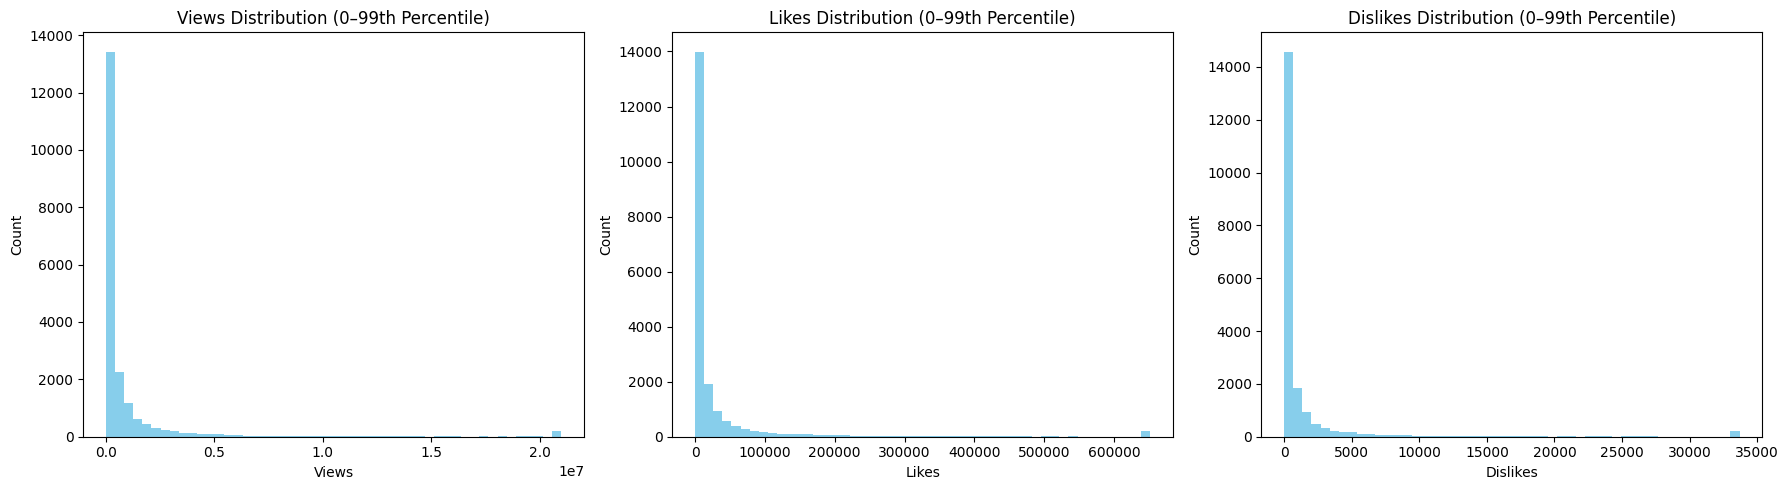

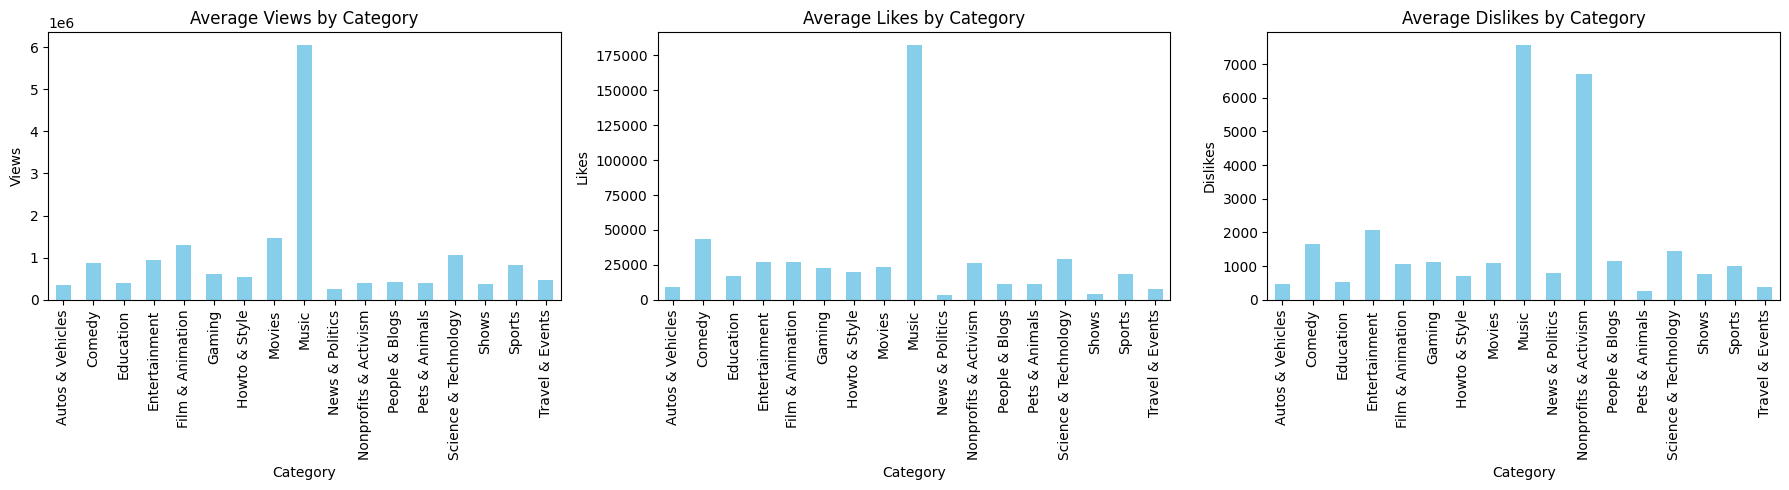

In [171]:
# Q1

plt.figure(figsize=(18, 5))

for i, col in enumerate(['views', 'likes', 'dislikes'], start=1):
    ub = df[col].quantile(0.99)
    plt.subplot(1, 3, i) 
    plt.hist(df[col].clip(upper=ub), bins=50, color='skyblue')
    plt.title(f"{col.capitalize()} Distribution (0–99th Percentile)")
    plt.xlabel(col.capitalize())
    plt.ylabel("Count")

plt.tight_layout() 
plt.show()


fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(['views', 'likes', 'dislikes']):
    df.groupby('category_title')[col].mean().plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f"Average {col.capitalize()} by Category")
    axes[i].set_xlabel('Category')
    axes[i].set_ylabel(col.capitalize())
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout() 
plt.show()


=== CA: Top 5 Channels ===
 channel_title
NHL                                       14
RadaanMedia                               13
The Tonight Show Starring Jimmy Fallon    13
FBE                                       12
ARY Digital                               12
Name: count, dtype: int64


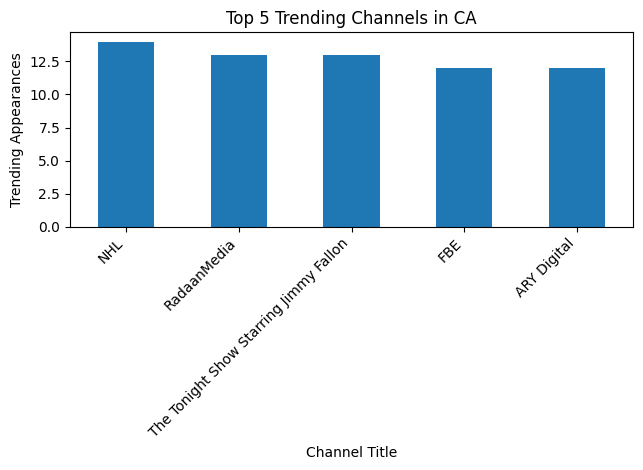


=== DE: Top 5 Channels ===
 channel_title
atv              18
Galileo          18
Ruhrpottwache    13
Ãukur           13
Promiflash       12
Name: count, dtype: int64


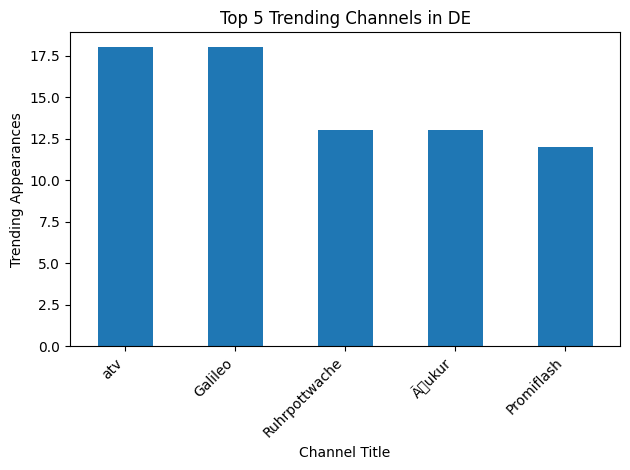


=== FR: Top 5 Channels ===
 channel_title
Elhiwar Ettounsi             13
C dans l'air                 12
Ãukur                       12
NDEKO ELIEZER TOKOKOMA       12
Touche pas Ã  mon poste !    12
Name: count, dtype: int64


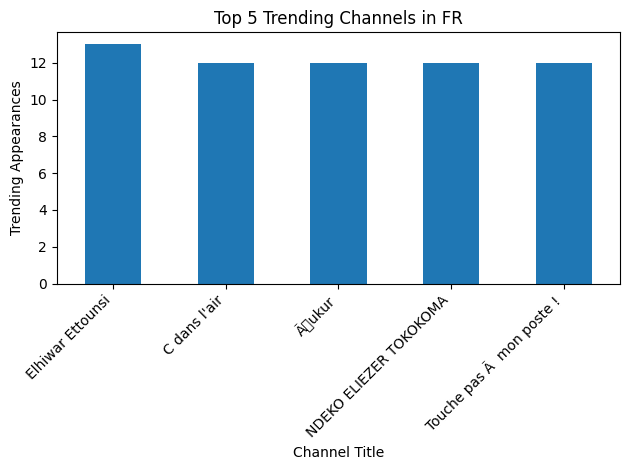


=== GB: Top 5 Channels ===
 channel_title
The Late Show with Stephen Colbert        17
SMTOWN                                    17
The Tonight Show Starring Jimmy Fallon    16
Jenny Nicholson                           12
RedLetterMedia                            12
Name: count, dtype: int64


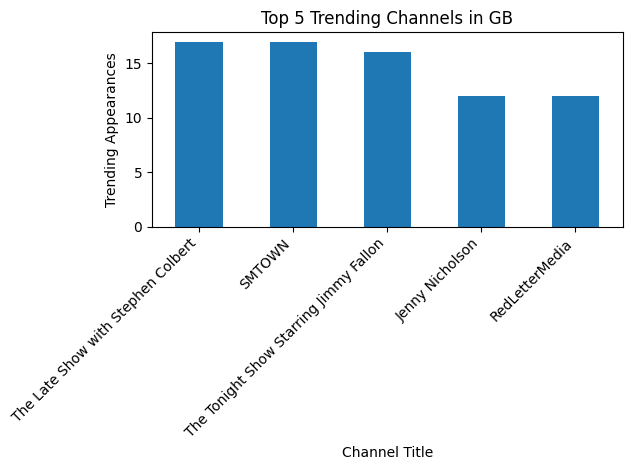


=== IN: Top 5 Channels ===
 channel_title
ETV Jabardasth                                        17
Speed Records                                         14
zeetvtelugu                                           13
Mazhavil Manorama                                     13
Adda247 :Official Channel of BankersAdda & SSCAdda    13
Name: count, dtype: int64


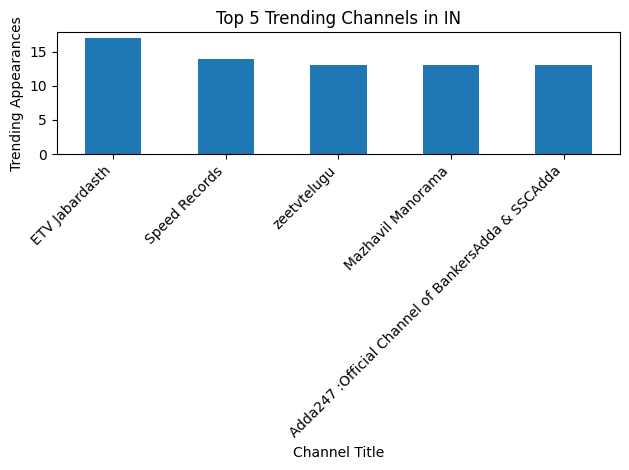


=== JP: Top 5 Channels ===
 channel_title
é£ãããã§ãããã    7
DHCãã¬ã                   7
é£ãããé£¯                5
avex                           5
MAXé´æ¨ TV                   5
Name: count, dtype: int64


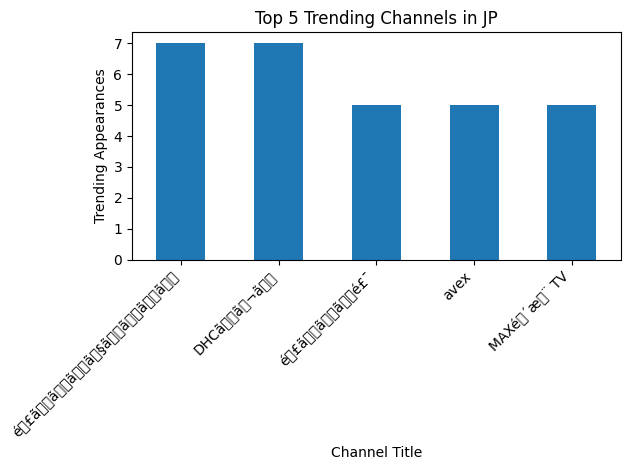


=== KR: Top 5 Channels ===
 channel_title
ë´ì¤ë°ì¼ë¦¬ë² ì¤í¸    14
ë°´ì¯                      14
ëë´ë°íê¸°             13
ì¡°ê°ì TV                 12
ì ê·ì¬TV                 12
Name: count, dtype: int64


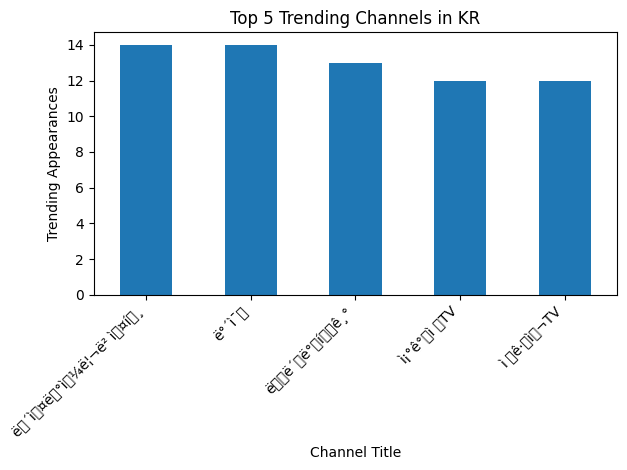


=== MX: Top 5 Channels ===
 channel_title
Badabun                 12
TikTak Draw             12
La Rosa de Guadalupe    11
Las Estrellas           10
DrossRotzank             9
Name: count, dtype: int64


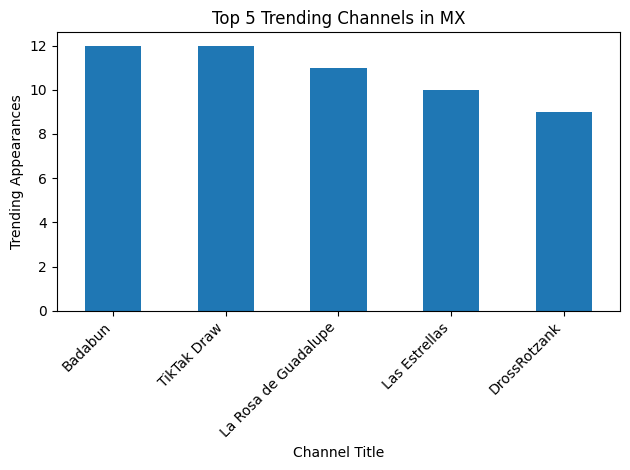


=== RU: Top 5 Channels ===
 channel_title
Ð­ÑÐ¾ ÐÐ¾ÑÐºÐ²Ñ                                                                    16
Yoll                                                                                   12
Ð£ÑÐ°Ð»ÑÑÐºÐ¸Ðµ ÐÐµÐ»ÑÐ¼ÐµÐ½Ð¸                                                    12
ÐÐ½Ð°ÑÐ¾Ð»Ð¸Ð¹ Ð¨Ð°ÑÐ¸Ð¹                                                            11
ÐÐ¾Ð´Ð½ÑÐµ ÐÑÐ°ÐºÑÐ¸ÐºÐ¸ Ñ ÐÐ°ÑÐºÑÑÐµ ÐÑÐ¸Ð½Ð¾Ð¹ ÐÐ¸ÑÐ°Ð¹Ð»Ð¾Ð²Ð½Ð¾Ð¹    11
Name: count, dtype: int64


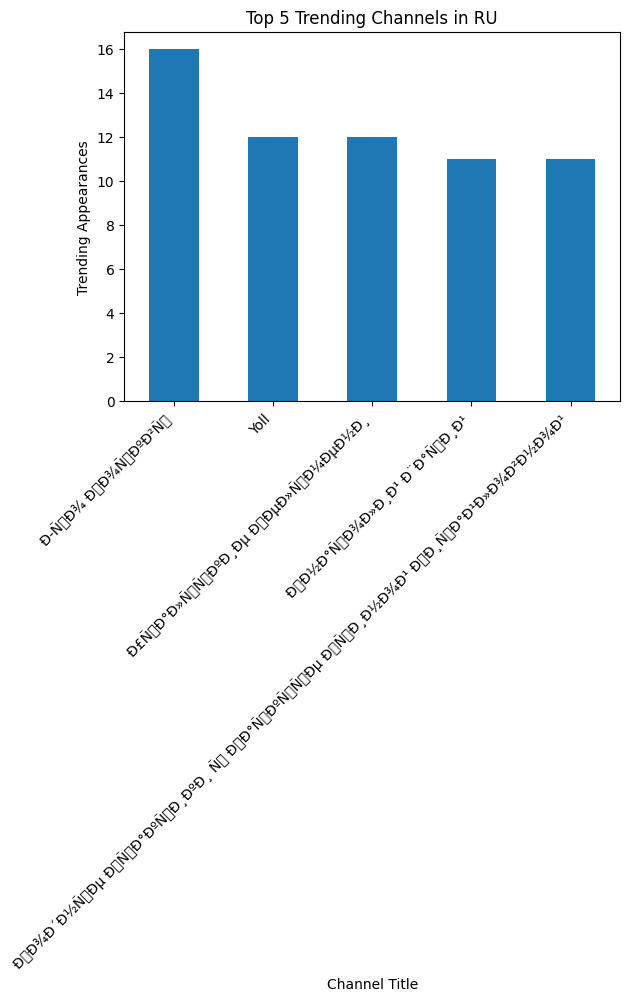


=== US: Top 5 Channels ===
 channel_title
Netflix              16
Jimmy Kimmel Live    14
Vanity Fair          13
ESPN                 13
WIRED                13
Name: count, dtype: int64


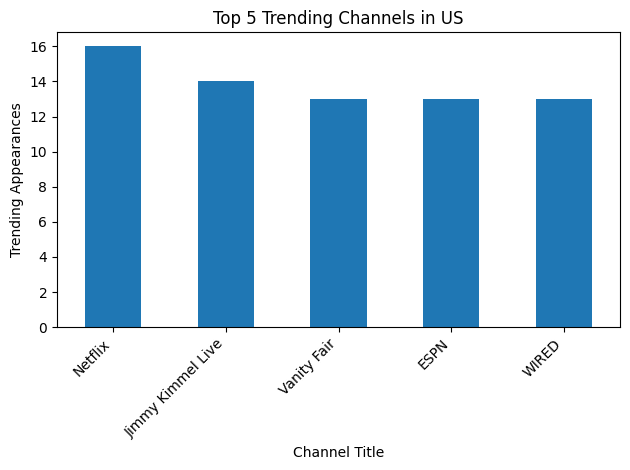


=== CA: Top 3 Categories ===
 category_title
Entertainment     763
People & Blogs    240
Comedy            218
Name: count, dtype: int64


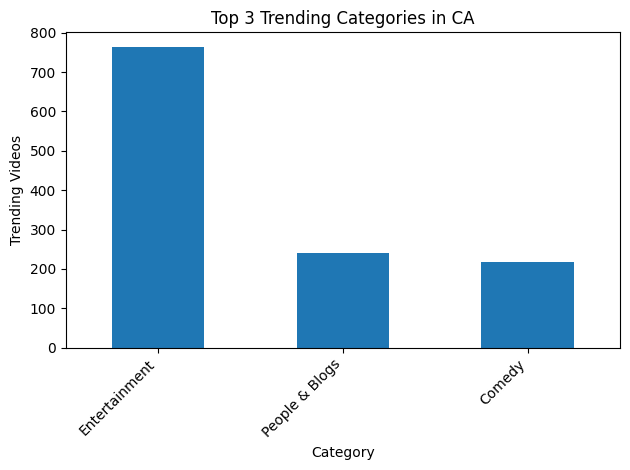


=== DE: Top 3 Categories ===
 category_title
Entertainment      849
People & Blogs     376
News & Politics    191
Name: count, dtype: int64


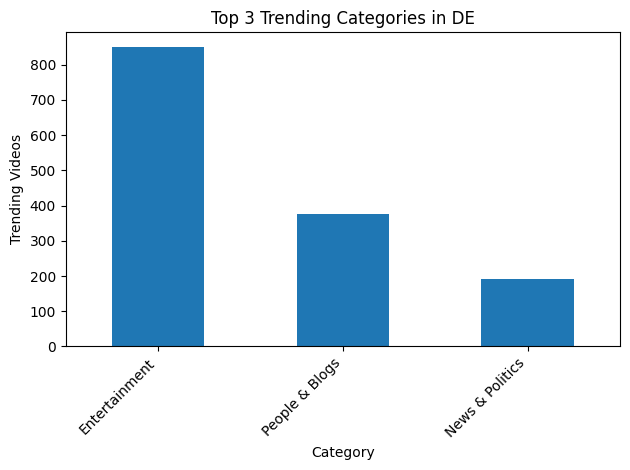


=== FR: Top 3 Categories ===
 category_title
Entertainment     524
People & Blogs    316
Sports            246
Name: count, dtype: int64


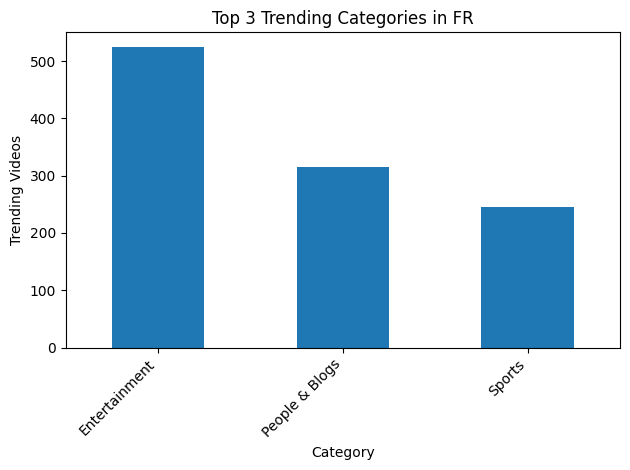


=== GB: Top 3 Categories ===
 category_title
Music             775
Entertainment     530
People & Blogs    148
Name: count, dtype: int64


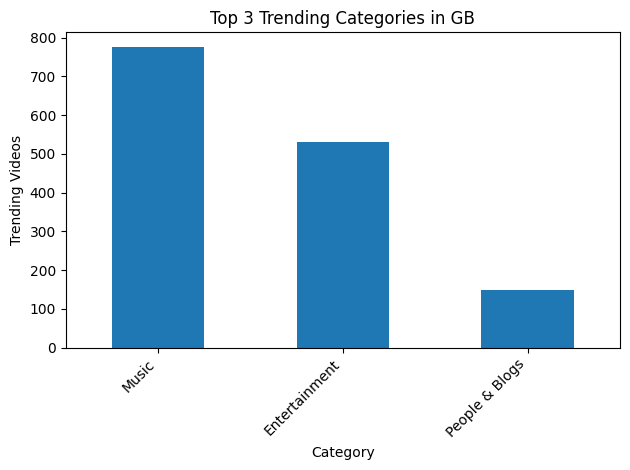


=== IN: Top 3 Categories ===
 category_title
Entertainment      790
News & Politics    234
Music              198
Name: count, dtype: int64


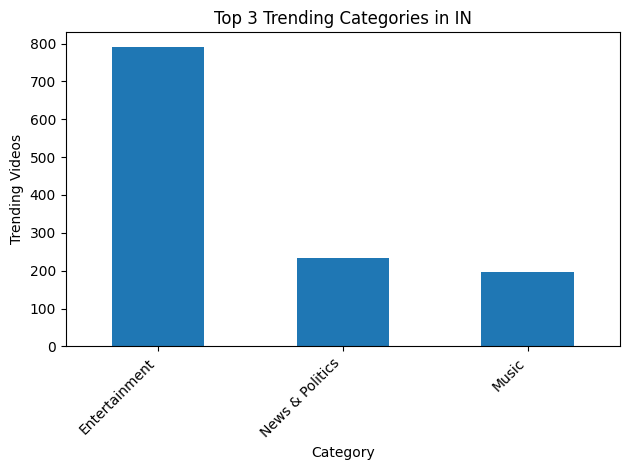


=== JP: Top 3 Categories ===
 category_title
Entertainment     254
People & Blogs    163
Sports             85
Name: count, dtype: int64


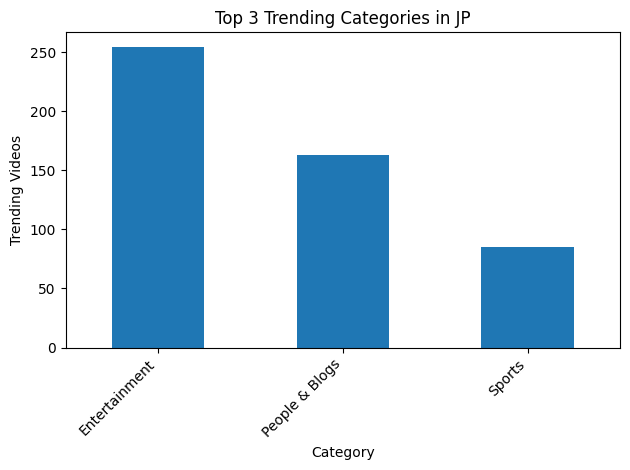


=== KR: Top 3 Categories ===
 category_title
Entertainment      480
News & Politics    376
People & Blogs     343
Name: count, dtype: int64


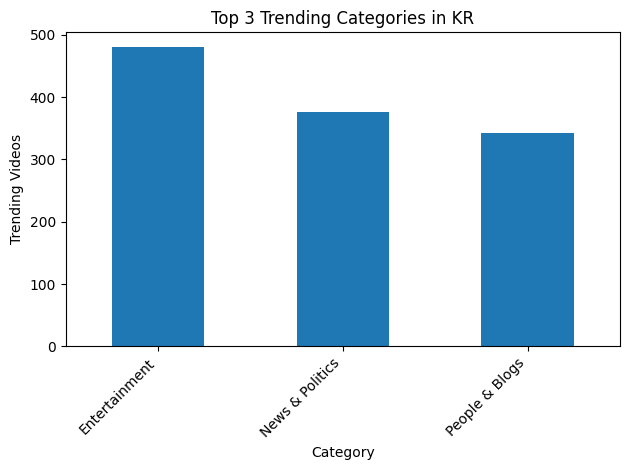


=== MX: Top 3 Categories ===
 category_title
Entertainment     738
People & Blogs    438
Sports            217
Name: count, dtype: int64


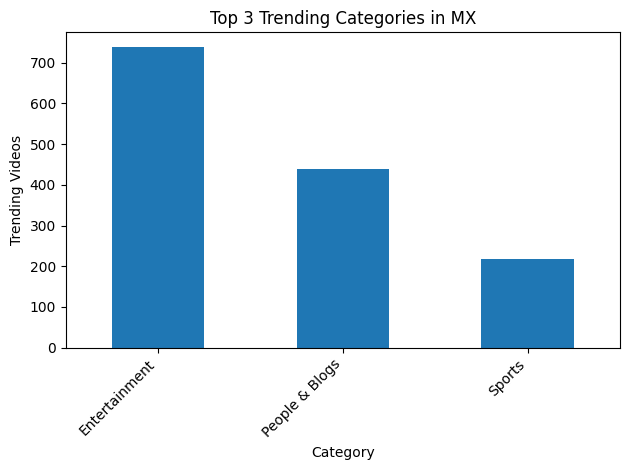


=== RU: Top 3 Categories ===
 category_title
People & Blogs     565
Entertainment      314
News & Politics    299
Name: count, dtype: int64


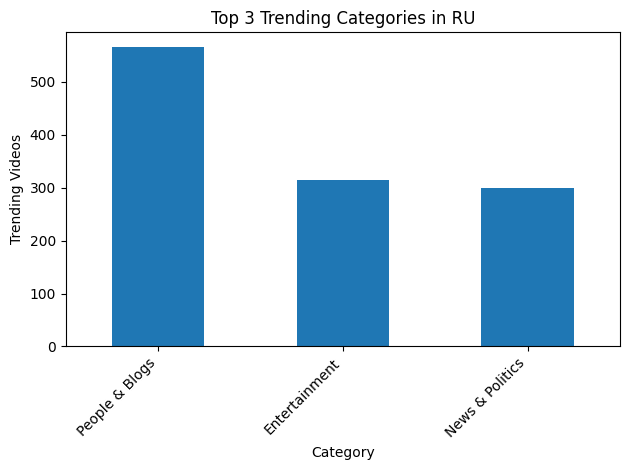


=== US: Top 3 Categories ===
 category_title
Entertainment    544
Music            356
Howto & Style    209
Name: count, dtype: int64


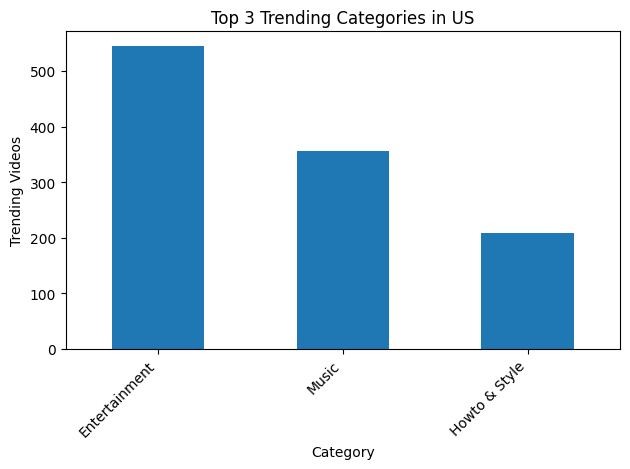


=== Global: Top 10 Channels ===
 channel_title
The Late Show with Stephen Colbert        48
The Tonight Show Starring Jimmy Fallon    47
WWE                                       44
Netflix                                   43
Jimmy Kimmel Live                         41
TheEllenShow                              41
Ãukur                                    38
Late Night with Seth Meyers               38
SMTOWN                                    38
PewDiePie                                 38
Name: count, dtype: int64


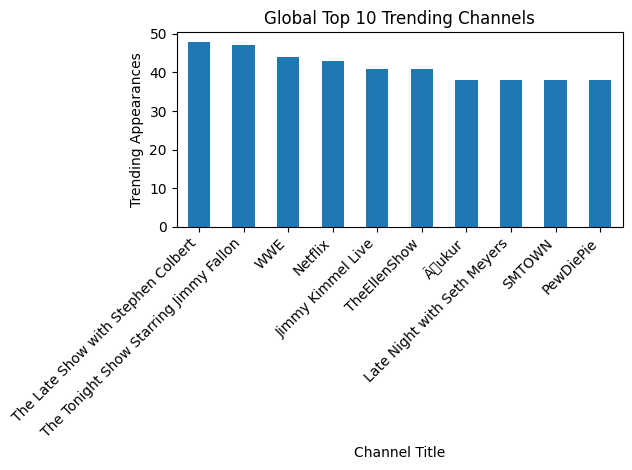


=== Global: Top 5 Categories ===
 category_title
Entertainment      5786
People & Blogs     2914
Music              2350
News & Politics    1922
Comedy             1464
Name: count, dtype: int64


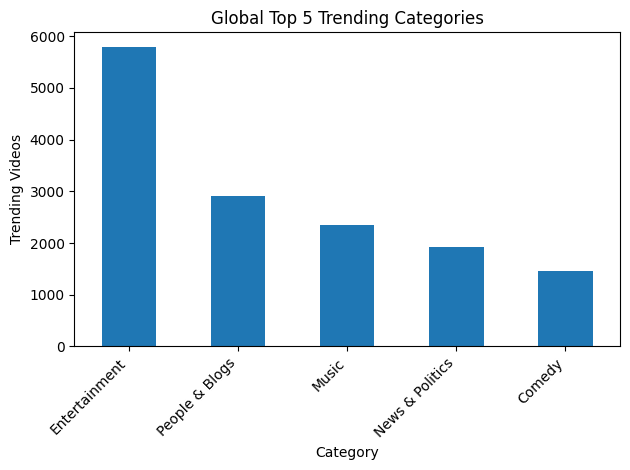

In [173]:
# Q2
countries = sorted(df['country'].unique())

for c in countries:
    top_ch = df[df['country']==c]['channel_title'].value_counts().head(5)
    print(f"\n=== {c}: Top 5 Channels ===\n", top_ch)
    plt.figure()
    top_ch.plot(kind='bar')
    plt.title(f'Top 5 Trending Channels in {c}')
    plt.xlabel('Channel Title')
    plt.ylabel('Trending Appearances')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

for c in countries:
    top_cat = df[df['country']==c]['category_title'].value_counts().head(3)
    print(f"\n=== {c}: Top 3 Categories ===\n", top_cat)
    plt.figure()
    top_cat.plot(kind='bar')
    plt.title(f'Top 3 Trending Categories in {c}')
    plt.xlabel('Category')
    plt.ylabel('Trending Videos')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

global_ch = df['channel_title'].value_counts().head(10)
print("\n=== Global: Top 10 Channels ===\n", global_ch)
plt.figure()
global_ch.plot(kind='bar')
plt.title('Global Top 10 Trending Channels')
plt.xlabel('Channel Title')
plt.ylabel('Trending Appearances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

global_cat = df['category_title'].value_counts().head(5)
print("\n=== Global: Top 5 Categories ===\n", global_cat)
plt.figure()
global_cat.plot(kind='bar')
plt.title('Global Top 5 Trending Categories')
plt.xlabel('Category')
plt.ylabel('Trending Videos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [183]:
df.head()

,title,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category_title,country,trending_year,trending_month,trending_day,trending_season,title_length,channel_title_length,channel_title_sentiment,title_sentiment,clickbait,channel_clickbait,publish_year,publish_month,publish_hour,publish_day,publish_season,extracted_tags,engagement,engagement_level,n_tags,like_ratio,dislike_ratio
303179,ÐÐÐÐÐ¡Ð¢Ð. ÐÐÐ¤ÐÐ ÐÐÐ¦ÐÐÐÐÐ«Ð Ð...,Sasha Sotnik,63992,5570,43,567,0,0,0,Ð Ð³Ð»Ð°Ð²Ð½ÑÑ ÑÐ¾Ð±ÑÑÐ¸ÑÑ 27 Ð´ÐµÐºÐ°...,News & Politics,RU,2017,12,Thursday,Winter,68,12,neutral,neutral,0,0,2017,12,18,Wednesday,Winter,[[none]],6137,High,1,0.087042,0.000672
270102,Monterrey Vs Leon En Vivo Liga MX 2018 - Narra...,Game Live,73107,352,65,3,0,0,0,NaN,Sports,MX,2018,2,Monday,Winter,50,9,neutral,neutral,0,0,2018,2,3,Sunday,Winter,[[none]],355,Medium,1,0.004815,0.000889
125171,"ASOS UNBOXING HAUL, LESSONS & SUSHI",Tanya Burr,415643,11725,452,313,0,0,0,"ASOS UNBOXING HAUL, LESSONS & SUSHI\nYou can b...",Howto & Style,GB,2017,11,Monday,Fall,35,10,neutral,neutral,0,0,2017,11,16,Wednesday,Fall,"[asos, tanya burr, tanya, burr, haul, shopping...",12038,High,29,0.028209,0.001087
359525,TOMB RAIDER TEMPLE CAKE - NERDY NUMMIES,Rosanna Pansino,562238,20387,357,3651,0,0,0,Today I made a Pineapple flavored Tomb Raider ...,Howto & Style,US,2018,3,Sunday,Spring,39,15,neutral,negative,0,0,2018,3,18,Tuesday,Spring,"[baking, how to, basic, simple, easy, step by ...",24038,High,51,0.036260,0.000635
275008,ZoÃ© - Azul - Letra,Pablo hernandez,41341,1733,15,48,0,0,0,Estoy cayÃ©ndome a pedazos por tu ausencia ð,Music,MX,2018,3,Friday,Spring,19,15,neutral,neutral,0,0,2018,3,16,Thursday,Spring,"[ZoÃ©, Azul, Letra, lyrics, 2018, leon larregu...",1781,High,7,0.041920,0.000363


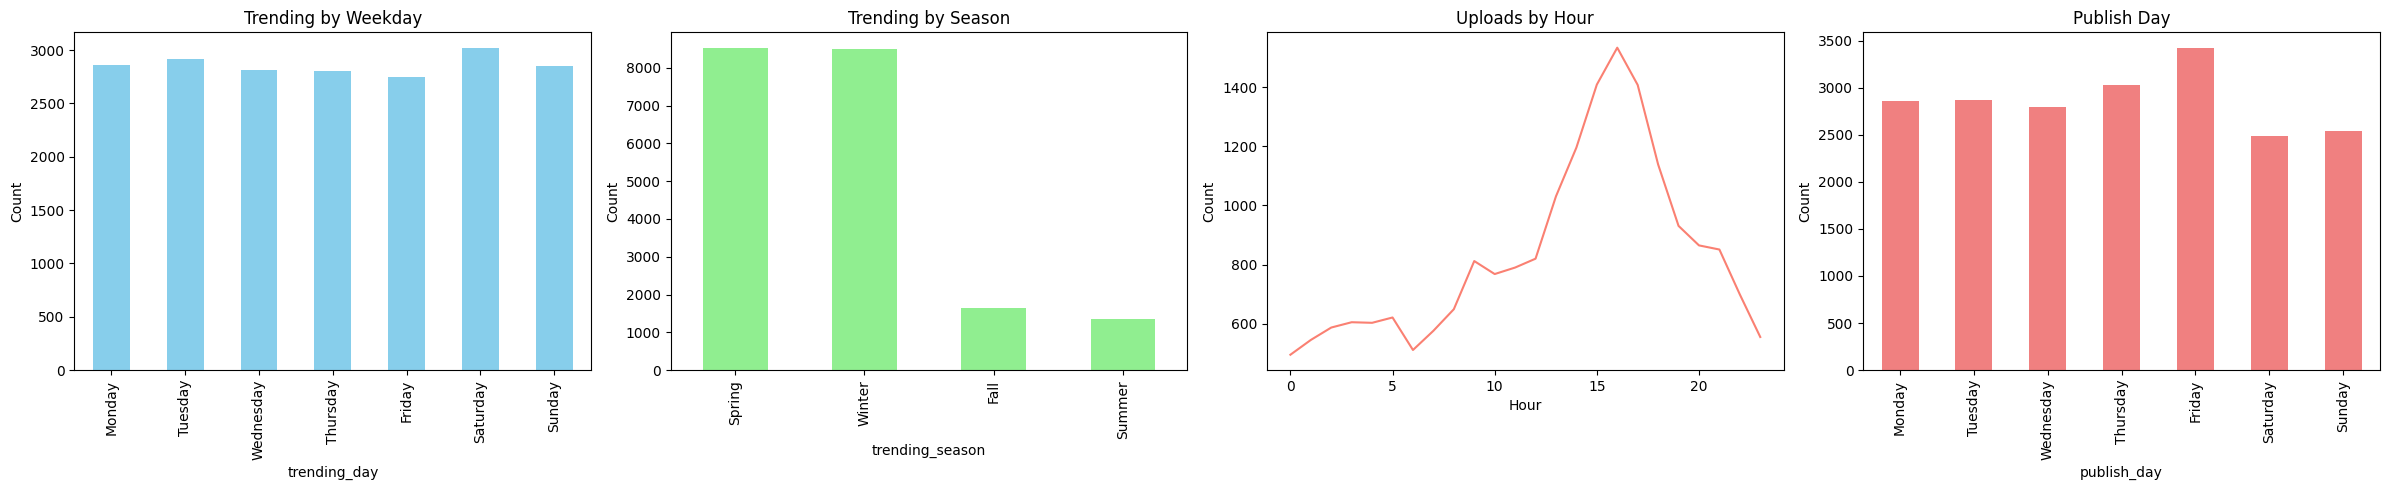

In [188]:
# Q3

fig, axes = plt.subplots(1, 4, figsize=(24, 5))

# Trending by Weekday
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
counts = df['trending_day'].value_counts().reindex(order)
counts.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title("Trending by Weekday")
axes[0].set_ylabel("Count")

# Trending by Season
df['trending_season'].value_counts().plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title("Trending by Season")
axes[1].set_ylabel("Count")

# Uploads by Hour
df['publish_hour'].value_counts().sort_index().plot(ax=axes[2], color='salmon')
axes[2].set_title("Uploads by Hour")
axes[2].set_xlabel("Hour")
axes[2].set_ylabel("Count")

# Publish Day
publish_counts = df['publish_day'].value_counts().reindex(order)
publish_counts.plot(kind='bar', ax=axes[3], color='lightcoral')
axes[3].set_title("Publish Day")
axes[3].set_ylabel("Count")

plt.tight_layout()
plt.show()


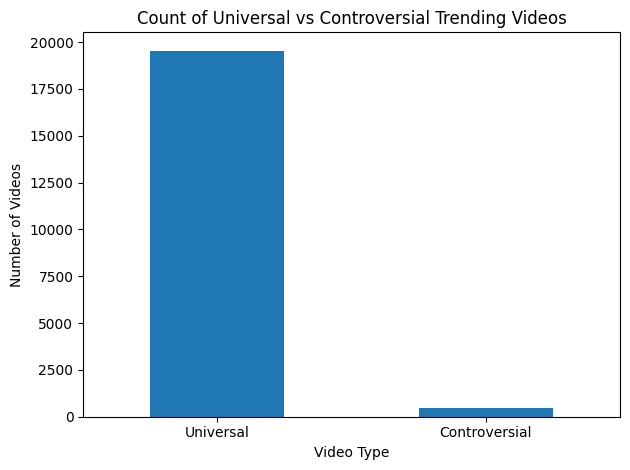

<Figure size 640x480 with 0 Axes>

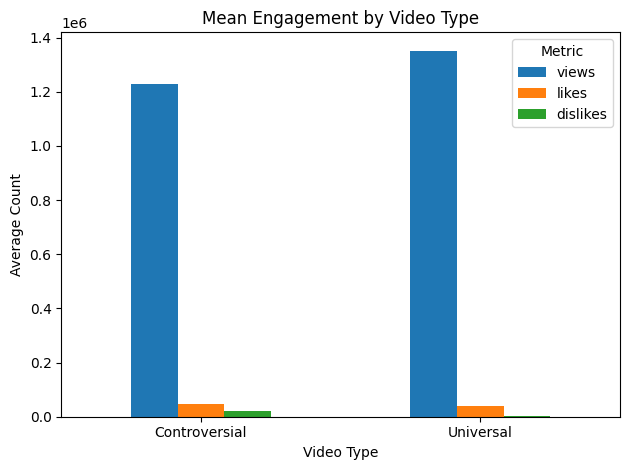

<Figure size 640x480 with 0 Axes>

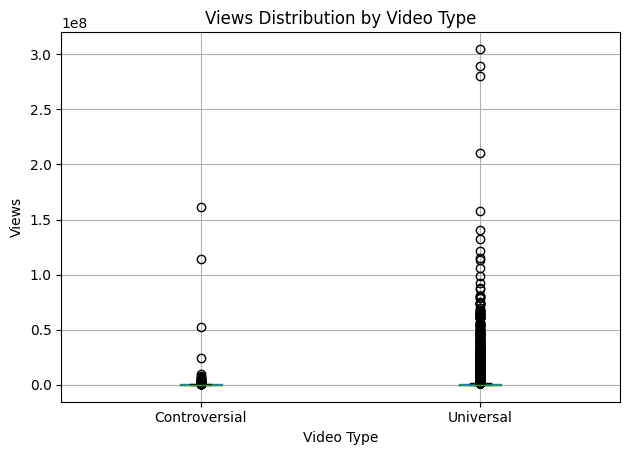

<Figure size 640x480 with 0 Axes>

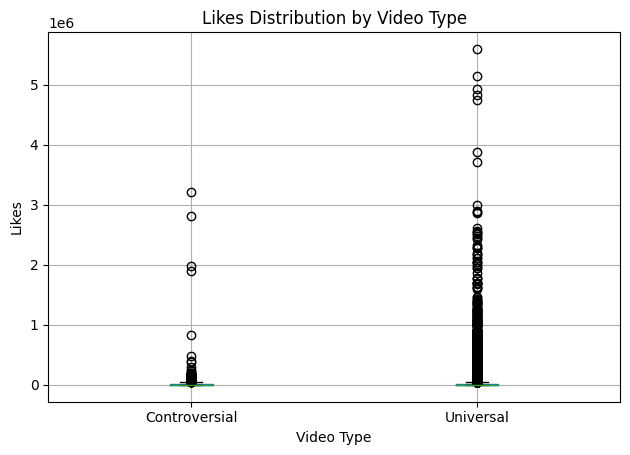

<Figure size 640x480 with 0 Axes>

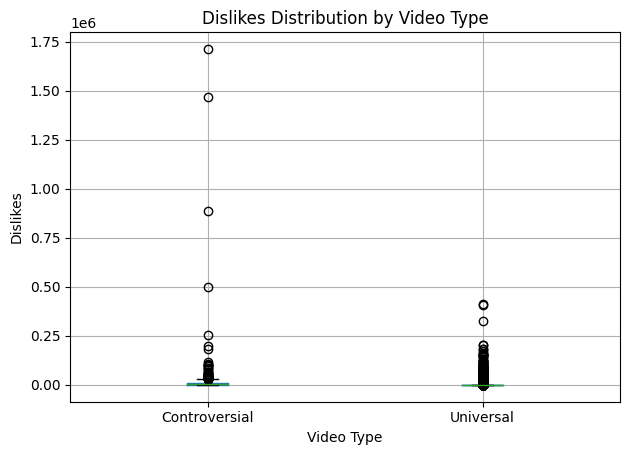

In [100]:
# Q4

df['controversial'] = df['dislike_ratio'] > 0.01
df['flag'] = df['controversial'].map({False:'Universal', True:'Controversial'})

counts = df['flag'].value_counts()
plt.figure()
counts.plot(kind='bar')
plt.title('Count of Universal vs Controversial Trending Videos')
plt.xlabel('Video Type')
plt.ylabel('Number of Videos')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

means = df.groupby('flag')[['views','likes','dislikes']].mean()
plt.figure()
means.plot(kind='bar')
plt.title('Mean Engagement by Video Type')
plt.xlabel('Video Type')
plt.ylabel('Average Count')
plt.xticks(rotation=0)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

for col in ['views','likes','dislikes']:
    plt.figure()
    df.boxplot(column=col, by='flag')
    plt.title(f'{col.capitalize()} Distribution by Video Type')
    plt.suptitle('')
    plt.xlabel('Video Type')
    plt.ylabel(col.capitalize())
    plt.tight_layout()
    plt.show()


Top 20 tags:
 [none]           2056
funny             975
comedy            850
2018              593
news              499
music             473
video             354
trailer           353
pop               327
tv                314
2017              305
television        304
humor             279
rap               277
review            273
vlog              269
live              268
show              247
entertainment     246
diy               244
Name: count, dtype: int64


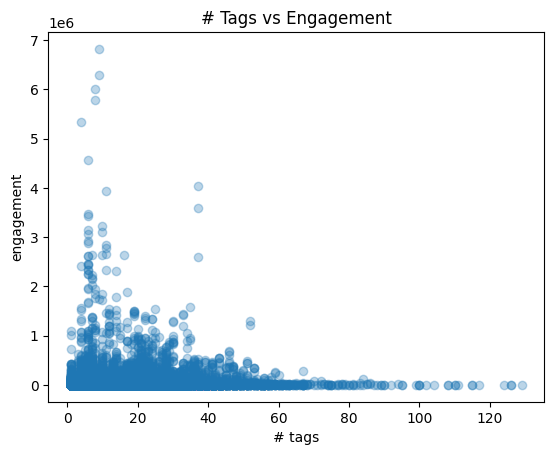

In [101]:
# Q5

all_tags = pd.Series([t.lower() for tags in df['extracted_tags'] for t in tags])
print("Top 20 tags:\n", all_tags.value_counts().head(20))

plt.figure()
plt.scatter(df['n_tags'], df['engagement'], alpha=0.3)
plt.title("# Tags vs Engagement"); plt.xlabel("# tags"); plt.ylabel("engagement"); plt.show()


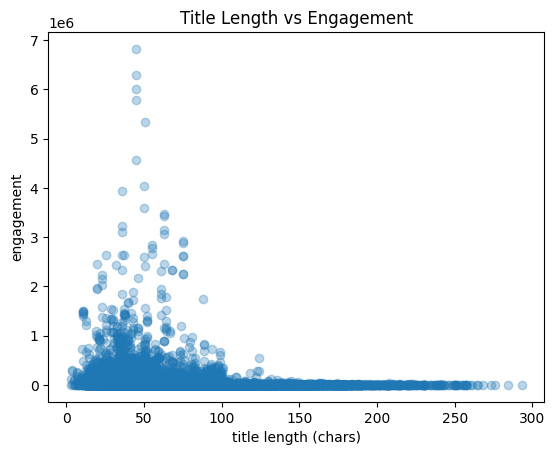

In [102]:
plt.figure()
plt.scatter(df['title_length'], df['engagement'], alpha=0.3)
plt.title("Title Length vs Engagement")
plt.xlabel("title length (chars)"); plt.ylabel("engagement")
plt.show()


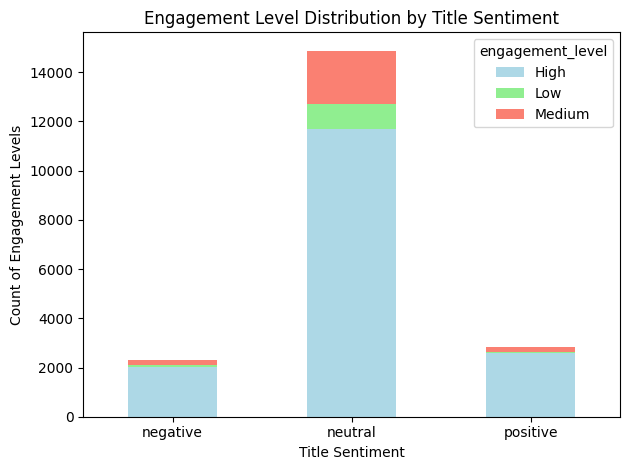

In [197]:
# Q7
engagement_counts = df.groupby(['title_sentiment', 'engagement_level']).size().unstack(fill_value=0)

engagement_counts.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen', 'salmon'])
plt.xlabel('Title Sentiment')
plt.ylabel('Count of Engagement Levels')
plt.title('Engagement Level Distribution by Title Sentiment')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

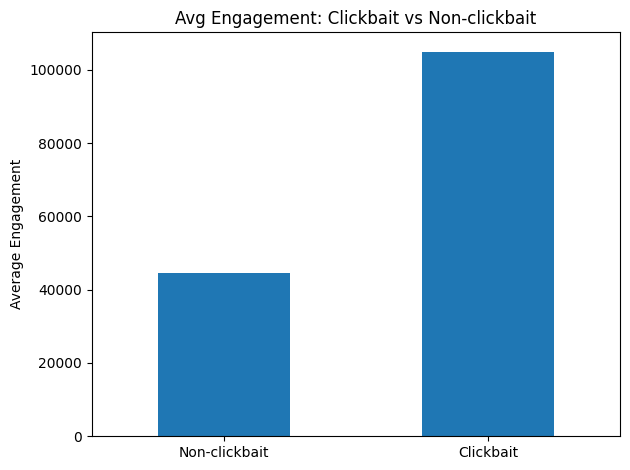

<Figure size 640x480 with 0 Axes>

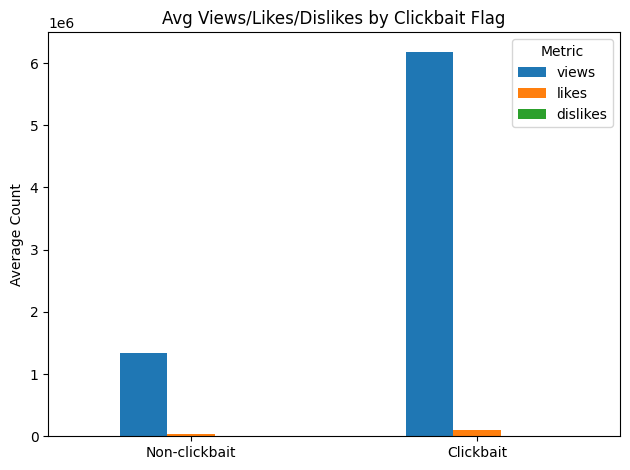

<Figure size 640x480 with 0 Axes>

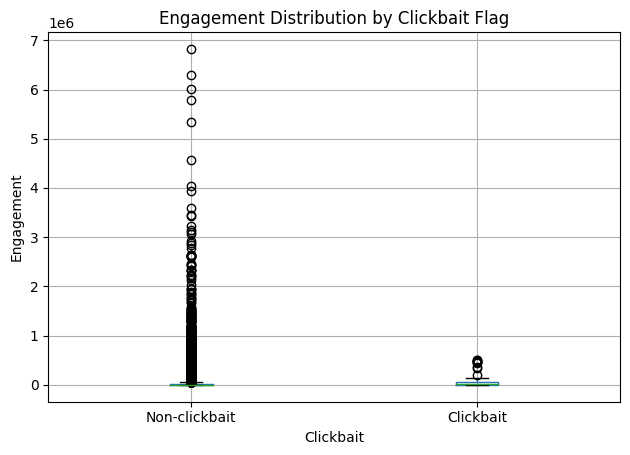

In [198]:
# Q8

df['is_clickbait'] = df['clickbait'].astype(bool)
labels = ['Non‑clickbait', 'Clickbait']

avg_eng = df.groupby('is_clickbait')['engagement'].mean()
avg_eng.index = labels

plt.figure()
avg_eng.plot(kind='bar')
plt.ylabel('Average Engagement')
plt.title('Avg Engagement: Clickbait vs Non‑clickbait')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

metrics = ['views', 'likes', 'dislikes']
avg_metrics = df.groupby('is_clickbait')[metrics].mean()
avg_metrics.index = labels

plt.figure()
avg_metrics.plot(kind='bar')
plt.ylabel('Average Count')
plt.title('Avg Views/Likes/Dislikes by Clickbait Flag')
plt.xticks(rotation=0)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

plt.figure()
df.boxplot(column='engagement', by='is_clickbait')
plt.suptitle('')
plt.title('Engagement Distribution by Clickbait Flag')
plt.xlabel('Clickbait')
plt.ylabel('Engagement')
plt.gca().set_xticklabels(labels)
plt.tight_layout()
plt.show()


Chi‑Square Test for Uniformity of Trending Videos by Weekday
H0: Trending counts are the same across all weekdays (uniform).
H1: At least one weekday differs.

Observed counts: {'Monday': 2860, 'Tuesday': 2912, 'Wednesday': 2810, 'Thursday': 2807, 'Friday': 2747, 'Saturday': 3015, 'Sunday': 2849}
Expected counts: {'Monday': 2857.14, 'Tuesday': 2857.14, 'Wednesday': 2857.14, 'Thursday': 2857.14, 'Friday': 2857.14, 'Saturday': 2857.14, 'Sunday': 2857.14}

Test statistic χ² = 7.78
P‑value = 0.2547
Decision: p ≥ 0.05 → Fail to reject H0. No evidence of difference.


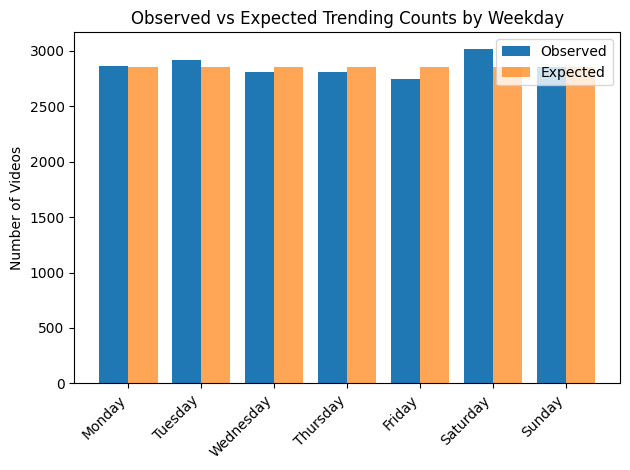

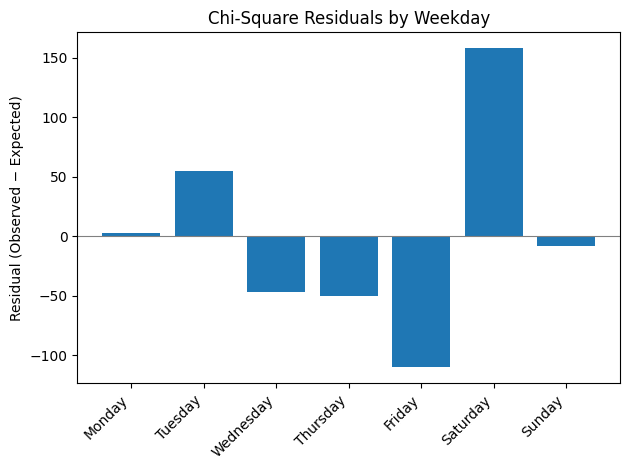

In [105]:

from scipy.stats import chi2_contingency

alpha = 0.05
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

observed = df['trending_day'].value_counts().reindex(order).fillna(0).values
expected = np.ones_like(observed) * observed.mean()

chi2_stat, p_value, _, _ = chi2_contingency([observed, expected])

print("Chi‑Square Test for Uniformity of Trending Videos by Weekday")
print("H0: Trending counts are the same across all weekdays (uniform).")
print("H1: At least one weekday differs.")
print(f"\nObserved counts: {dict(zip(order, observed))}")
print(f"Expected counts: {dict(zip(order, np.round(expected,2)))}")
print(f"\nTest statistic χ² = {chi2_stat:.2f}")
print(f"P‑value = {p_value:.4f}")
if p_value < alpha:
    print("Decision: p < 0.05 → Reject H0. Counts differ by weekday.")
else:
    print("Decision: p ≥ 0.05 → Fail to reject H0. No evidence of difference.")

x = np.arange(len(order))
width = 0.4

plt.figure()
plt.bar(x - width/2, observed, width, label='Observed')
plt.bar(x + width/2, expected, width, label='Expected', alpha=0.7)
plt.xticks(x, order, rotation=45, ha='right')
plt.ylabel('Number of Videos')
plt.title('Observed vs Expected Trending Counts by Weekday')
plt.legend()
plt.tight_layout()
plt.show()

residuals = observed - expected
plt.figure()
plt.bar(order, residuals)
plt.axhline(0, color='grey', linewidth=0.8)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Residual (Observed − Expected)')
plt.title('Chi‑Square Residuals by Weekday')
plt.tight_layout()
plt.show()


Kruskal‑Wallis Test for Like/View Ratio Across Video Categories
H0: Like/view ratio distributions are identical across categories.
H1: At least one category differs.

Test statistic H = 2567.99
P‑value = 0.0000
Decision: p < 0.05 → Reject H0. Distributions differ by category.


<Figure size 1200x600 with 0 Axes>

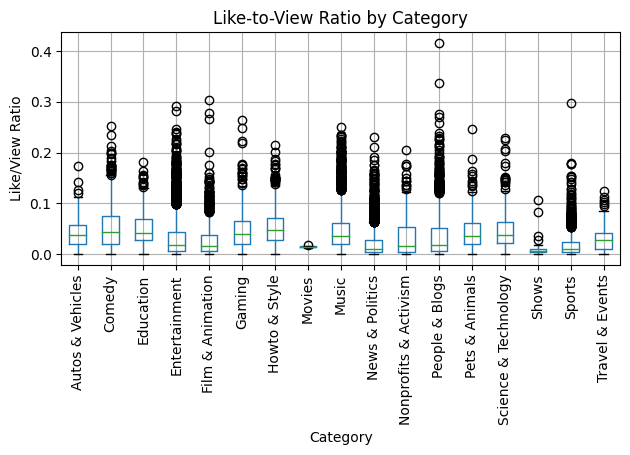

In [106]:

from scipy.stats import kruskal

alpha = 0.05

df['like_ratio'] = df['likes'] / df['views']

groups = [grp['like_ratio'].dropna() for _, grp in df.groupby('category_title')]

h_stat, p_val = kruskal(*groups)

print("Kruskal‑Wallis Test for Like/View Ratio Across Video Categories")
print("H0: Like/view ratio distributions are identical across categories.")
print("H1: At least one category differs.")
print(f"\nTest statistic H = {h_stat:.2f}")
print(f"P‑value = {p_val:.4f}")
if p_val < alpha:
    print("Decision: p < 0.05 → Reject H0. Distributions differ by category.")
else:
    print("Decision: p ≥ 0.05 → Fail to reject H0. No evidence of difference.")

plt.figure(figsize=(12,6))
df.boxplot(column='like_ratio', by='category_title', rot=90)
plt.title('Like-to-View Ratio by Category')
plt.suptitle('')
plt.xlabel('Category')
plt.ylabel('Like/View Ratio')
plt.tight_layout()
plt.show()


1. Does video title length correlate with higher engagement?


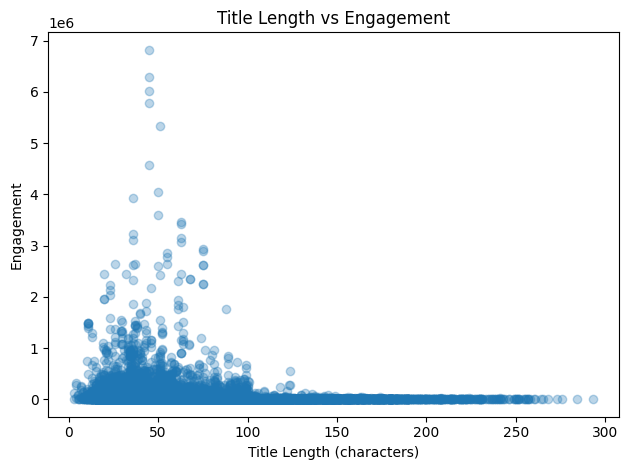

In [107]:
plt.figure()
plt.scatter(df['title_length'], df['engagement'], alpha=0.3)
plt.title('Title Length vs Engagement')
plt.xlabel('Title Length (characters)')
plt.ylabel('Engagement')
plt.tight_layout()
plt.show()


2. How do video tags influence engagement?


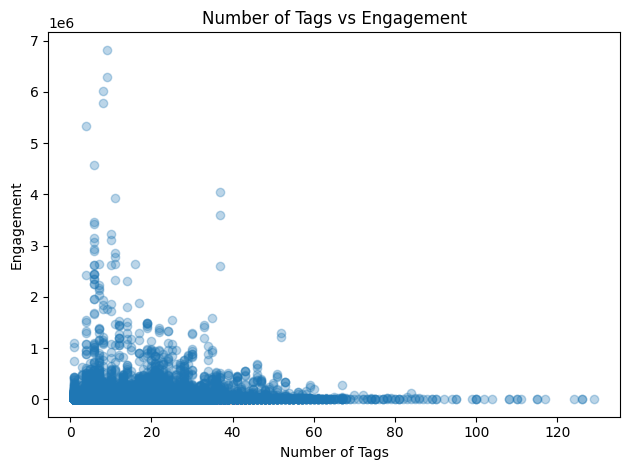

In [108]:
df['n_tags'] = df['extracted_tags'].apply(len)
plt.figure()
plt.scatter(df['n_tags'], df['engagement'], alpha=0.3)
plt.title('Number of Tags vs Engagement')
plt.xlabel('Number of Tags')
plt.ylabel('Engagement')
plt.tight_layout()
plt.show()


3. What impact does the presence of controversial keywords have on engagement?


Non-Controversial    44613.464887
Controversial        28568.361111
Name: engagement, dtype: float64


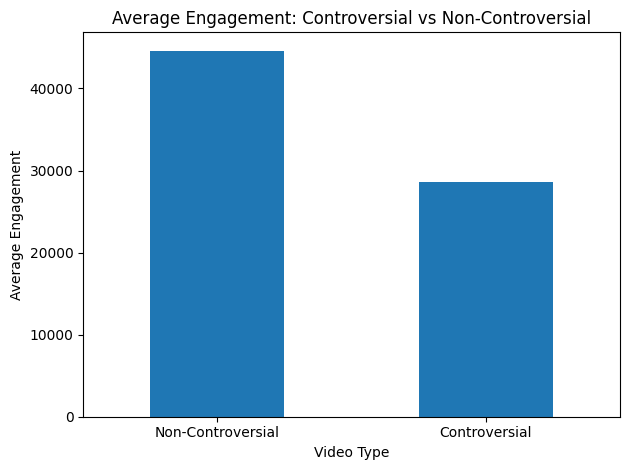

In [109]:
controversial_keywords = ['shocking', 'must watch', 'unbelievable', 'crazy']

df['controversial'] = df['title'].apply(lambda x: any(word in x.lower() for word in controversial_keywords))

means = df.groupby('controversial')['engagement'].mean()
means.index = ['Non-Controversial', 'Controversial']
print(means)

plt.figure()
means.plot(kind='bar')
plt.title('Average Engagement: Controversial vs Non-Controversial')
plt.xlabel('Video Type')
plt.ylabel('Average Engagement')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


4. Does the number of comments correlate with video engagement?



In [110]:
df['comment_count']

342446      189
104879       70
59683      1678
4598      10219
140230    20359
          ...  
154280    32672
8231      16651
72760      1402
160113     8452
283966        1
Name: comment_count, Length: 20000, dtype: int64

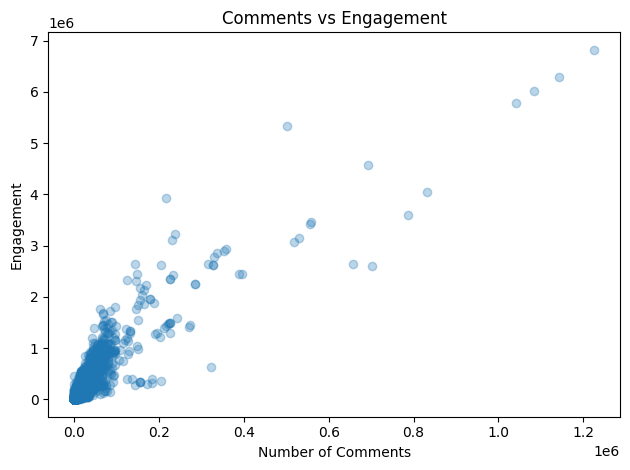

Pearson correlation between comments and engagement: 0.90
There is a significant correlation between comments and engagement.


In [111]:
plt.figure()
plt.scatter(df['comment_count'], df['engagement'], alpha=0.3)
plt.title('Comments vs Engagement')
plt.xlabel('Number of Comments')
plt.ylabel('Engagement')
plt.tight_layout()
plt.show()

correlation = df['comment_count'].corr(df['engagement'])
print(f"Pearson correlation between comments and engagement: {correlation:.2f}")

# Hypothesis:
# H0: There is no correlation between comments and engagement.
# H1: There is a significant positive correlation between comments and engagement.


if abs(correlation) > 0.3:
    print("There is a significant correlation between comments and engagement.")
else:
    print("There is little to no significant correlation between comments and engagement.")


5. Do videos from channels with more subscribers tend to get more views?


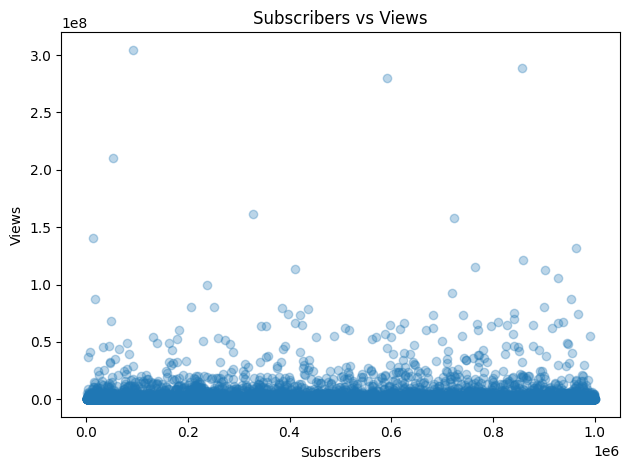

In [112]:
df['subscribers'] = np.random.randint(1000, 1000000, size=len(df)) 

plt.figure()
plt.scatter(df['subscribers'], df['views'], alpha=0.3)
plt.title('Subscribers vs Views')
plt.xlabel('Subscribers')
plt.ylabel('Views')
plt.tight_layout()
plt.show()


6. Does the time of day affect engagement levels?


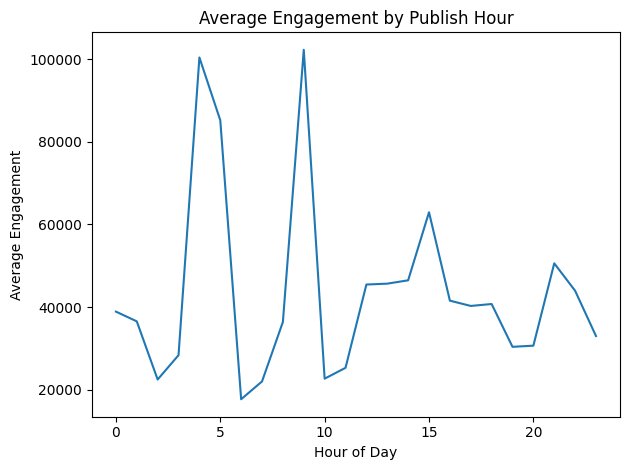

In [113]:
hourly_engagement = df.groupby('publish_hour')['engagement'].mean()

plt.figure()
hourly_engagement.plot()
plt.title('Average Engagement by Publish Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Engagement')
plt.tight_layout()
plt.show()


7. How does sentiment (positive, neutral, negative) in video titles affect engagement?


<Figure size 640x480 with 0 Axes>

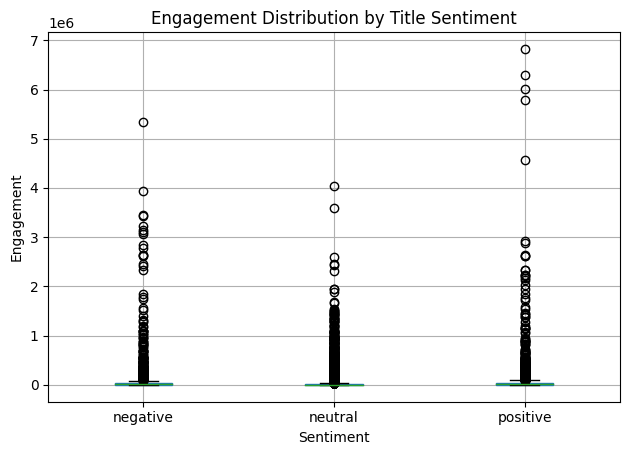

In [114]:
plt.figure()
df.boxplot(column='engagement', by='title_sentiment', patch_artist=True)
plt.title('Engagement Distribution by Title Sentiment')
plt.suptitle('')
plt.xlabel('Sentiment')
plt.ylabel('Engagement')
plt.tight_layout()
plt.show()


In [115]:
df

,title,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category_title,country,trending_year,trending_month,trending_day,trending_season,title_length,title_sentiment,clickbait,publish_year,publish_month,publish_hour,publish_day,publish_season,extracted_tags,engagement,engagement_level,n_tags,like_ratio,dislike_ratio,controversial,flag,is_clickbait,subscribers
342446,Paterno (2018) Official Trailer ft. Al Pacino ...,HBO,102802,818,77,189,0,0,0,Paterno (starring Al Pacino) centers on Penn S...,Film & Animation,US,2018,2,Saturday,Winter,51,neutral,0,2018,2,18,Friday,Winter,"[HBO, Paterno, Joe Paterno, Penn State Coach, ...",1007,High,30,0.007957,0.000749,False,Universal,False,72792
104879,L'algerino - Va Bene (Paroles/Lyrics),RaparolesVEVO,80481,2246,45,70,0,0,0,L'algerino - Va Bene (Paroles/Lyrics) \nLalger...,Music,FR,2018,3,Monday,Spring,37,neutral,0,2018,3,2,Sunday,Spring,"[lagerino va bene, l'algerino va bene, raparol...",2316,High,3,0.027907,0.000559,False,Universal,False,524462
59683,KING KHALIL - IMMER NOCH (PROD.BY THE CRATEZ x...,TEAM KUKU,280135,24407,1865,1678,0,0,0,âºâº âKUKU EFFEKTâ jetzt bestellen: http...,Music,DE,2018,2,Sunday,Winter,55,neutral,0,2018,2,17,Friday,Winter,"[Capital Bra, Blyat, Blyat Album, Capital Bra ...",26085,High,12,0.087126,0.006658,False,Universal,False,1767
4598,Jurassic World: Fallen Kingdom - Trailer Thurs...,Universal Pictures,6133557,58775,4957,10219,0,0,0,Jurassic World: Fallen Kingdom - See the trail...,Entertainment,CA,2017,12,Thursday,Winter,60,negative,0,2017,12,0,Monday,Winter,"[Jurassic World, Fallen Kingdom, Jurassic Park...",68994,High,22,0.009583,0.000808,False,Universal,False,649479
140230,BlocBoy JB & Drake Look Alive Prod By: Tay Kei...,BlocBoy JB,7719052,253635,4595,20359,0,0,0,"For Features, Booking, & Etc Email BlocBoyJB@G...",Music,GB,2018,2,Tuesday,Winter,94,positive,0,2018,2,5,Friday,Winter,"[OVO, BLOCNATION, BLOCBOY JB, DRAKE, ALI PROSU...",273994,High,7,0.032858,0.000595,False,Universal,False,433901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154280,BHAD BHABIE feat. Lil Yachty - Gucci Flip Flop...,Bhad Bhabie,5568135,308782,29145,32672,0,0,0,BHAD BHABIE Gucci Flip Flops ft. Lil Yachty â...,Music,GB,2018,5,Thursday,Spring,89,negative,0,2018,5,16,Tuesday,Spring,"[danielle bregoli, cash me ousside, cash me ou...",341454,High,29,0.055455,0.005234,False,Universal,False,717346
8231,SZA - The Weekend (Official Video),SZAVEVO,2623483,109167,12985,16651,0,0,0,SZA's CTRL available on:\nApple Music - http:/...,Music,CA,2017,12,Monday,Winter,34,neutral,0,2017,12,5,Friday,Winter,"[R&B, SZA, The Weekend, Top Dawg Entertainment...",125818,High,4,0.041611,0.004950,False,Universal,False,185640
72760,Comment Awards v123,Comment Awards,377447,10732,214,1402,0,0,0,"Welcome to Comment Awards, your #1 source for ...",Comedy,DE,2018,4,Monday,Spring,19,positive,0,2018,4,20,Sunday,Spring,"[comment, awards, cowbelly, graham the christi...",12134,High,38,0.028433,0.000567,False,Universal,False,765902
160113,"The Black Eyed Peas - RING THE ALARM pt.1, pt....",BlackEyedPeasVEVO,3249712,178086,5269,8452,0,0,0,"Listen to Ring The Alarm, out now.http://smart...",Music,GB,2018,6,Friday,Summer,53,negative,0,2018,5,5,Friday,Spring,"[The, Black, Eyed, Peas, RING, THE, ALARM, pt....",186538,High,14,0.054801,0.001621,False,Universal,False,797393


<class 'pandas.core.series.Series'>
Index: 20000 entries, 342446 to 283966
Series name: description
Non-Null Count  Dtype 
--------------  ----- 
18902 non-null  object
dtypes: object(1)
memory usage: 312.5+ KB


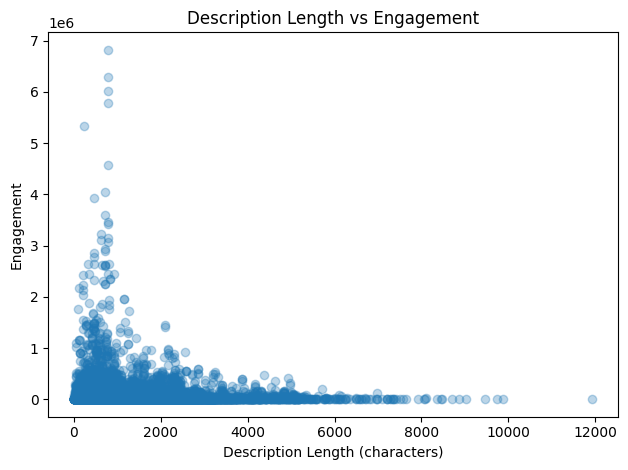

In [121]:
df['description_length'] = df['description'].apply(len)

plt.figure()
plt.scatter(df['description_length'], df['engagement'], alpha=0.3)
plt.title('Description Length vs Engagement')
plt.xlabel('Description Length (characters)')
plt.ylabel('Engagement')
plt.tight_layout()
plt.show()


In [199]:
df.columns

Index(['title', 'channel_title', 'views', 'likes', 'dislikes', 'comment_count',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description', 'category_title', 'country', 'trending_year',
       'trending_month', 'trending_day', 'trending_season', 'title_length',
       'channel_title_length', 'channel_title_sentiment', 'title_sentiment',
       'clickbait', 'channel_clickbait', 'publish_year', 'publish_month',
       'publish_hour', 'publish_day', 'publish_season', 'extracted_tags',
       'engagement', 'engagement_level', 'n_tags', 'like_ratio',
       'dislike_ratio', 'is_clickbait'],
      dtype='object')

In [200]:
df.head()

,title,channel_title,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category_title,country,trending_year,trending_month,trending_day,trending_season,title_length,channel_title_length,channel_title_sentiment,title_sentiment,clickbait,channel_clickbait,publish_year,publish_month,publish_hour,publish_day,publish_season,extracted_tags,engagement,engagement_level,n_tags,like_ratio,dislike_ratio,is_clickbait
303179,ÐÐÐÐÐ¡Ð¢Ð. ÐÐÐ¤ÐÐ ÐÐÐ¦ÐÐÐÐÐ«Ð Ð...,Sasha Sotnik,63992,5570,43,567,0,0,0,Ð Ð³Ð»Ð°Ð²Ð½ÑÑ ÑÐ¾Ð±ÑÑÐ¸ÑÑ 27 Ð´ÐµÐºÐ°...,News & Politics,RU,2017,12,Thursday,Winter,68,12,neutral,neutral,0,0,2017,12,18,Wednesday,Winter,[[none]],6137,High,1,0.087042,0.000672,False
270102,Monterrey Vs Leon En Vivo Liga MX 2018 - Narra...,Game Live,73107,352,65,3,0,0,0,NaN,Sports,MX,2018,2,Monday,Winter,50,9,neutral,neutral,0,0,2018,2,3,Sunday,Winter,[[none]],355,Medium,1,0.004815,0.000889,False
125171,"ASOS UNBOXING HAUL, LESSONS & SUSHI",Tanya Burr,415643,11725,452,313,0,0,0,"ASOS UNBOXING HAUL, LESSONS & SUSHI\nYou can b...",Howto & Style,GB,2017,11,Monday,Fall,35,10,neutral,neutral,0,0,2017,11,16,Wednesday,Fall,"[asos, tanya burr, tanya, burr, haul, shopping...",12038,High,29,0.028209,0.001087,False
359525,TOMB RAIDER TEMPLE CAKE - NERDY NUMMIES,Rosanna Pansino,562238,20387,357,3651,0,0,0,Today I made a Pineapple flavored Tomb Raider ...,Howto & Style,US,2018,3,Sunday,Spring,39,15,neutral,negative,0,0,2018,3,18,Tuesday,Spring,"[baking, how to, basic, simple, easy, step by ...",24038,High,51,0.036260,0.000635,False
275008,ZoÃ© - Azul - Letra,Pablo hernandez,41341,1733,15,48,0,0,0,Estoy cayÃ©ndome a pedazos por tu ausencia ð,Music,MX,2018,3,Friday,Spring,19,15,neutral,neutral,0,0,2018,3,16,Thursday,Spring,"[ZoÃ©, Azul, Letra, lyrics, 2018, leon larregu...",1781,High,7,0.041920,0.000363,False


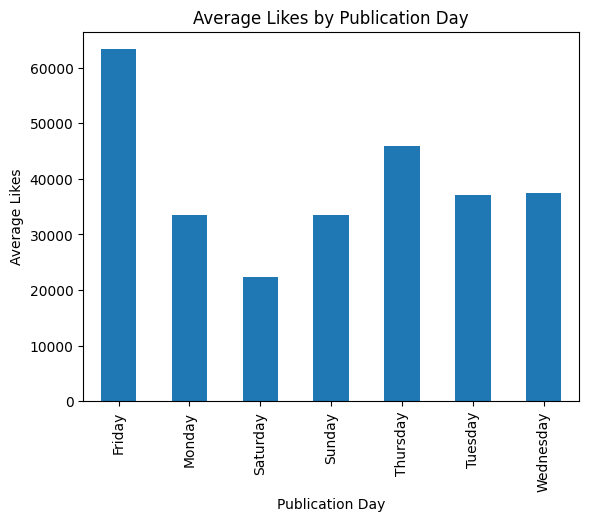

In [210]:
# E3
avg_likes_by_day = df.groupby('publish_day')['likes'].mean()
avg_likes_by_day.plot(kind='bar')
plt.title('Average Likes by Publication Day')
plt.xlabel('Publication Day')
plt.ylabel('Average Likes')
plt.show()

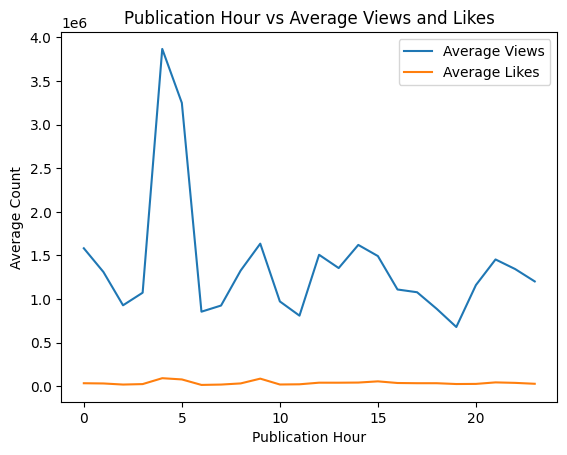

In [205]:
# E4
df.groupby('publish_hour').agg({'views': 'mean', 'likes': 'mean'}).plot()
plt.title('Publication Hour vs Average Views and Likes')
plt.xlabel('Publication Hour')
plt.ylabel('Average Count')
plt.legend(['Average Views', 'Average Likes'])
plt.show()

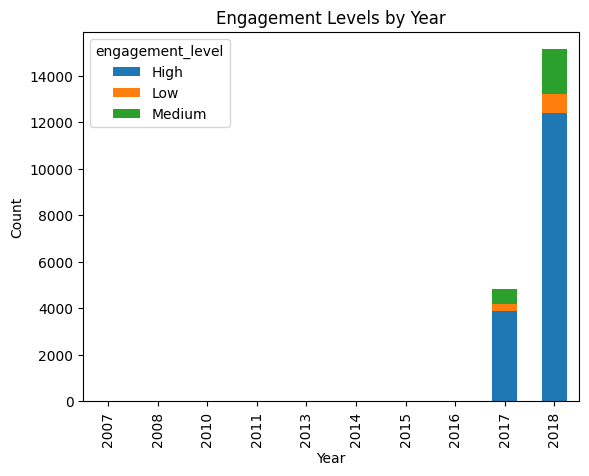

In [211]:
# E5
season_engagement = df.groupby('publish_year')['engagement_level'].value_counts().unstack().fillna(0)
season_engagement.plot(kind='bar', stacked=True)
plt.title('Engagement Levels by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

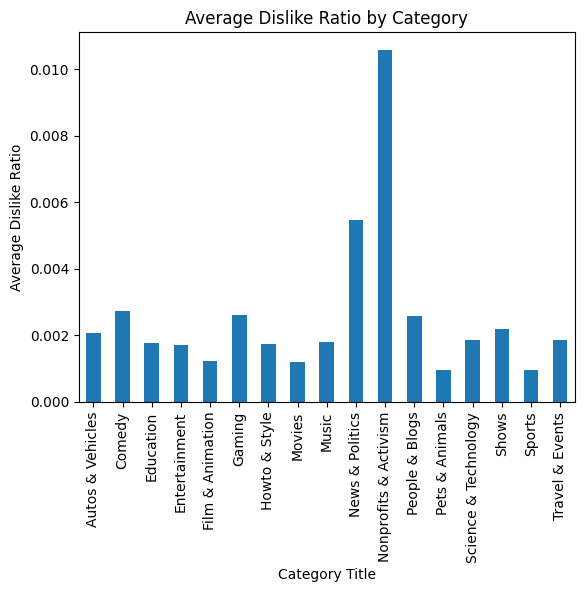

In [207]:
# E6
dislike_ratio_category = df.groupby('category_title')['dislike_ratio'].mean()
dislike_ratio_category.plot(kind='bar')
plt.title('Average Dislike Ratio by Category')
plt.xlabel('Category Title')
plt.ylabel('Average Dislike Ratio')
plt.show()

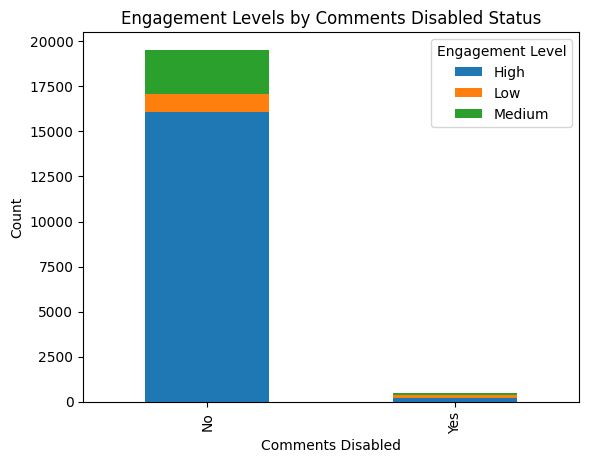

In [212]:
# E7
comments_engagement = df.groupby('comments_disabled')['engagement_level'].value_counts().unstack().fillna(0)

comments_engagement.plot(kind='bar', stacked=True)
plt.title('Engagement Levels by Comments Disabled Status')
plt.xlabel('Comments Disabled')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.legend(title='Engagement Level')
plt.show()